<a href="https://colab.research.google.com/github/IslamTayeb/life-edit-gene-classifier/blob/main/LifeEdit_EDA_SJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.model_selection import train_test_split

In [35]:
raw_df1 = pd.read_csv("data/GSE218462_raw_counts_GRCh38.p13_NCBI.tsv", sep = '\t') # gene dataset we use

In [36]:
raw_df1

,GeneID,GSM6745599,GSM6745600,GSM6745601,GSM6745602,GSM6745603,GSM6745604,GSM6745605,GSM6745606,GSM6745607,...,GSM6745628,GSM6745629,GSM6745630,GSM6745631,GSM6745632,GSM6745633,GSM6745634,GSM6745635,GSM6745636,GSM6745637
0,100287102,22,12,28,23,25,20,25,16,24,...,23,17,14,17,26,32,14,24,32,28
1,653635,211,123,334,211,243,281,281,143,245,...,289,214,160,279,246,275,179,203,245,226
2,102466751,3,0,4,2,3,6,1,2,6,...,2,3,3,5,4,2,5,2,4,5
3,107985730,2,1,1,2,3,2,1,0,3,...,2,2,0,2,1,1,1,1,2,1
4,100302278,1,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,4236,3074,7594,6209,6113,7364,4842,3128,5136,...,2727,2779,1899,5550,6694,6645,2262,2990,5252,4305
39372,4556,269,213,459,361,406,496,346,204,309,...,89,112,97,334,415,227,63,158,311,240
39373,4519,18928,14177,30965,25035,25410,28746,18416,13381,21677,...,25261,21399,13606,28620,31561,48604,19777,17037,25027,22450
39374,4576,134,87,228,152,156,214,130,92,124,...,180,114,78,179,219,337,108,98,128,147


In [37]:
genes = raw_df1["GeneID"]
samples = raw_df1.columns

In [38]:
samples # some of these are edited, some are unedited

Index(['GeneID', 'GSM6745599', 'GSM6745600', 'GSM6745601', 'GSM6745602',
       'GSM6745603', 'GSM6745604', 'GSM6745605', 'GSM6745606', 'GSM6745607',
       'GSM6745609', 'GSM6745610', 'GSM6745611', 'GSM6745612', 'GSM6745613',
       'GSM6745614', 'GSM6745615', 'GSM6745616', 'GSM6745617', 'GSM6745618',
       'GSM6745619', 'GSM6745620', 'GSM6745621', 'GSM6745622', 'GSM6745623',
       'GSM6745624', 'GSM6745625', 'GSM6745626', 'GSM6745627', 'GSM6745628',
       'GSM6745629', 'GSM6745630', 'GSM6745631', 'GSM6745632', 'GSM6745633',
       'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637'],
      dtype='object')

In [39]:
raw_df1_T = raw_df1.T
raw_df1_T

,0,1,2,3,4,5,6,7,8,9,...,39366,39367,39368,39369,39370,39371,39372,39373,39374,39375
GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,22,211,3,2,1,0,0,33,64,25,...,25802,21,15,8,14544,4236,269,18928,134,194
GSM6745600,12,123,0,1,1,0,0,19,56,12,...,16362,17,17,11,10924,3074,213,14177,87,188
GSM6745601,28,334,4,1,0,0,0,51,95,31,...,38224,32,24,14,24383,7594,459,30965,228,374
GSM6745602,23,211,2,2,0,0,0,44,71,27,...,31670,28,19,16,19763,6209,361,25035,152,243
GSM6745603,25,243,3,3,0,0,0,36,58,32,...,33866,35,23,10,18650,6113,406,25410,156,274
GSM6745604,20,281,6,2,0,0,0,40,77,24,...,40186,37,27,7,22464,7364,496,28746,214,315
GSM6745605,25,281,1,1,0,0,0,32,61,27,...,27199,40,33,8,14375,4842,346,18416,130,293
GSM6745606,16,143,2,0,1,1,0,19,45,16,...,18906,15,11,6,10908,3128,204,13381,92,152
GSM6745607,24,245,6,3,0,0,0,34,61,29,...,29229,22,16,7,16875,5136,309,21677,124,214


In [40]:
raw_df1_T.columns = raw_df1_T.iloc[0]
raw_df1_T = raw_df1_T[1:]

In [41]:
raw_df1_T

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,22,211,3,2,1,0,0,33,64,25,...,25802,21,15,8,14544,4236,269,18928,134,194
GSM6745600,12,123,0,1,1,0,0,19,56,12,...,16362,17,17,11,10924,3074,213,14177,87,188
GSM6745601,28,334,4,1,0,0,0,51,95,31,...,38224,32,24,14,24383,7594,459,30965,228,374
GSM6745602,23,211,2,2,0,0,0,44,71,27,...,31670,28,19,16,19763,6209,361,25035,152,243
GSM6745603,25,243,3,3,0,0,0,36,58,32,...,33866,35,23,10,18650,6113,406,25410,156,274
GSM6745604,20,281,6,2,0,0,0,40,77,24,...,40186,37,27,7,22464,7364,496,28746,214,315
GSM6745605,25,281,1,1,0,0,0,32,61,27,...,27199,40,33,8,14375,4842,346,18416,130,293
GSM6745606,16,143,2,0,1,1,0,19,45,16,...,18906,15,11,6,10908,3128,204,13381,92,152
GSM6745607,24,245,6,3,0,0,0,34,61,29,...,29229,22,16,7,16875,5136,309,21677,124,214
GSM6745609,20,175,1,1,0,0,0,22,38,26,...,25079,9,7,4,15199,3913,141,16099,81,148


In [42]:
# scaling data to make it easier for machine learning
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(raw_df1_T)

In [43]:
scaled_df1 = pd.DataFrame(scaled_data1)

In [44]:
scaled_df1.columns = raw_df1_T.columns
scaled_df1.index = raw_df1_T.index

In [45]:
scaled_df1

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.238021,-0.214857,-0.267632,0.466206,-0.318275,-0.133587,0.136065,-0.604440,-0.270274,-0.375282
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.264922,-0.613129,0.007233,1.309818,-0.981598,-0.819478,-0.337051,-1.184536,-1.084285,-0.450273
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.113269,0.880390,0.969260,2.153430,1.484606,1.848533,1.741280,0.865277,1.357749,1.874436
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.400312,0.482118,0.282098,2.715838,0.638045,1.031012,0.913327,0.141225,0.041475,0.237141
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.639197,1.179094,0.831828,1.028614,0.434101,0.974346,1.293509,0.187012,0.110753,0.624593
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,1.326699,1.378230,1.381557,0.185003,1.132972,1.712771,2.053874,0.594337,1.115277,1.137029
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,-0.086052,1.676933,2.206152,0.466206,-0.349242,0.224115,0.786600,-0.666955,-0.339551,0.862063
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.988181,-0.812265,-0.817361,-0.096201,-0.984529,-0.787604,-0.413087,-1.281728,-0.997688,-0.900216
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.134775,-0.115289,-0.130199,0.185003,0.108853,0.397654,0.474005,-0.268787,-0.443467,-0.125313
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.316670,-1.409672,-1.367091,-0.658609,-0.198254,-0.324244,-0.945342,-0.949860,-1.188201,-0.950210


**1-3: BE4**

**4-6: ABE8**

**7-9: Cas9**

**10-12: Utelectro**

**13-15: BE4**

**16-18: ABE8**

**19-21: Cas9**

**22-24: Utelectro**

**25-27: dCas9**

**28-30: BE4alone**

**31-33: ABE8alone**

**34-39: Unedited**

In [46]:
df_trimmed = scaled_df1.iloc[:, :100]
df_trimmed # only taking a subset of genes to examine if there are major difference between edited and unedited gene expression for our classifier

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,142678,8510,984,728661,8511,728642,9906,112268218,65220,2782
GSM6745599,0.212625,-0.318248,-0.042237,0.184916,1.063410,-0.29277,-0.235702,0.117663,0.140983,-0.006097,...,-0.033716,0.160668,0.215201,-0.276345,-0.162783,-0.045774,-0.354676,0.128767,0.167597,-0.298188
GSM6745600,-1.311857,-1.500716,-1.647234,-0.818915,1.063410,-0.29277,-0.235702,-1.159822,-0.267197,-1.511998,...,-1.233399,-1.275890,-0.918223,-0.908697,-1.093974,-1.187089,-0.994120,-1.012394,-0.919433,-0.882330
GSM6745601,1.127315,1.334520,0.492762,-0.818915,-0.773389,-0.29277,-0.235702,1.760144,1.722682,0.688935,...,1.435799,2.435216,2.648187,0.998539,1.766111,2.253319,1.100167,2.030702,1.939633,1.646200
GSM6745602,0.365073,-0.318248,-0.577236,0.184916,-0.773389,-0.29277,-0.235702,1.121401,0.498141,0.225580,...,0.003167,0.160668,0.222585,0.187455,0.701894,0.102378,-0.071432,0.491864,-0.001566,0.122810
GSM6745603,0.669970,0.111740,-0.042237,1.188747,-0.773389,-0.29277,-0.235702,0.391410,-0.165152,0.804773,...,0.438004,0.579663,0.484712,0.223654,0.236298,0.332836,0.040149,0.267090,0.656290,0.359264
GSM6745604,-0.092271,0.622352,1.562760,0.184916,-0.773389,-0.29277,-0.235702,0.756406,0.804276,-0.121935,...,0.647657,0.938803,1.547990,0.369581,0.701894,1.183335,0.201083,0.785799,0.809790,0.174932
GSM6745605,0.669970,0.622352,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,0.026414,-0.012084,0.225580,...,0.525359,2.016221,1.005275,-0.125893,1.500057,0.689497,-0.208762,1.045154,0.995661,0.752506
GSM6745606,-0.702064,-1.231973,-0.577236,-1.822745,1.063410,3.41565,-0.235702,-1.159822,-0.828445,-1.048644,...,-0.711207,-0.797037,-0.811157,-0.623629,-0.628379,-0.896274,-0.895413,-0.355362,-0.333627,-0.769188
GSM6745607,0.517522,0.138615,1.562760,1.188747,-0.773389,-0.29277,-0.235702,0.208912,-0.012084,0.457258,...,0.348707,0.459950,0.392414,0.403518,0.568866,0.382219,0.201083,0.457283,0.858868,0.460964
GSM6745609,-0.092271,-0.801985,-1.112235,-0.818915,-0.773389,-0.29277,-0.235702,-0.886075,-1.185602,0.109742,...,-0.577262,0.639520,-0.050618,-1.240144,0.635380,-0.161003,-0.983391,-0.217039,-0.077794,-0.660072


In [47]:
mechanisms = {
    "BE4": ["GSM6745599", "GSM6745600", "GSM6745601", "GSM6745611", "GSM6745612", "GSM6745613"],
    "ABE8": ["GSM6745602", "GSM6745603", "GSM6745604", "GSM6745614", "GSM6745615", "GSM6745616"],
    "Cas9": ["GSM6745605", "GSM6745606", "GSM6745607", "GSM6745617", "GSM6745618", "GSM6745619"],
    "Utelectro": ["GSM6745609", "GSM6745610", "GSM6745620", "GSM6745621", "GSM6745622"],
    "dCas9": ["GSM6745623", "GSM6745624", "GSM6745625"],
    "BE4alone": ["GSM6745626", "GSM6745627", "GSM6745628"],
    "ABE8alone": ["GSM6745629", "GSM6745630", "GSM6745631"],
    "UT": ["GSM6745632", "GSM6745633", "GSM6745634", "GSM6745635", "GSM6745636", "GSM6745637"]
}
#GSM6745608 is missing from Utelectro

In [48]:
df_be4 = df_trimmed.loc[mechanisms["BE4"]]
df_abe8 = df_trimmed.loc[mechanisms["ABE8"]]
df_cas9 = df_trimmed.loc[mechanisms["Cas9"]]
df_utelectro = df_trimmed.loc[mechanisms["Utelectro"]]
df_dcas9 = df_trimmed.loc[mechanisms["dCas9"]]
df_be4alone = df_trimmed.loc[mechanisms["BE4alone"]]
df_abe8alone = df_trimmed.loc[mechanisms["ABE8alone"]]

df_edited = df_trimmed.loc[mechanisms["BE4"]+mechanisms["ABE8"]+mechanisms["Cas9"]+mechanisms["Utelectro"]+mechanisms["dCas9"]+mechanisms["BE4alone"]+mechanisms["ABE8alone"]]
df_ut = df_trimmed.loc[mechanisms["UT"]]


In [49]:
edited_median = df_edited.median()
ut_median = df_ut.median()

In [50]:
# comparing difference between edited and unedited genes
edited_median


GeneID
100287102   -0.092271
653635      -0.103254
102466751   -0.309736
107985730    0.184916
100302278   -0.773389
               ...   
728642      -0.023826
9906        -0.067140
112268218   -0.182458
65220       -0.179605
2782        -0.103156
Length: 100, dtype: float64

In [51]:
ut_median

GeneID
100287102    0.974866
653635       0.010962
102466751    0.492762
107985730   -0.818915
100302278   -0.773389
               ...   
728642       0.264247
9906        -0.277427
112268218    0.111477
65220        0.103900
2782        -0.019041
Length: 100, dtype: float64

**Boxplots of the first 100 genes**

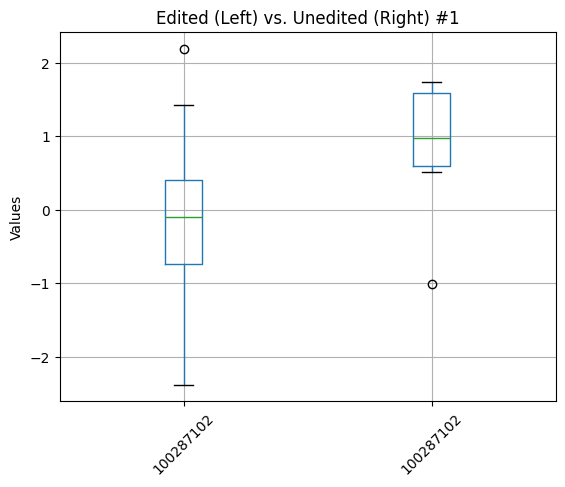

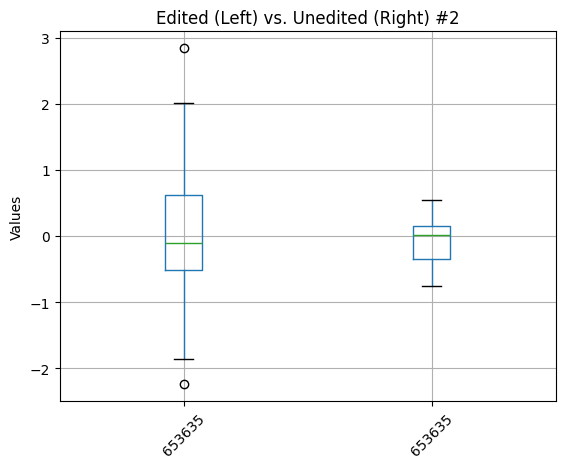

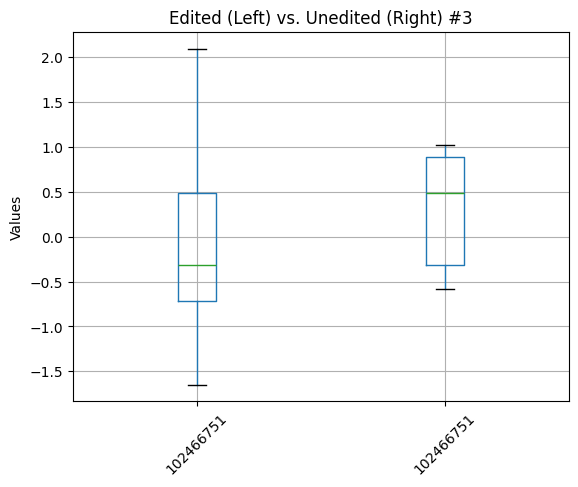

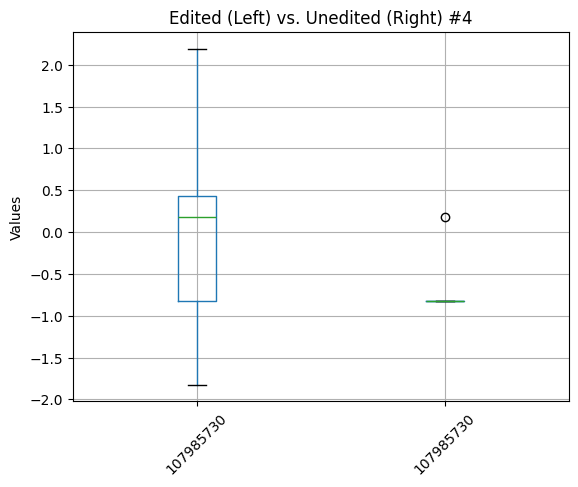

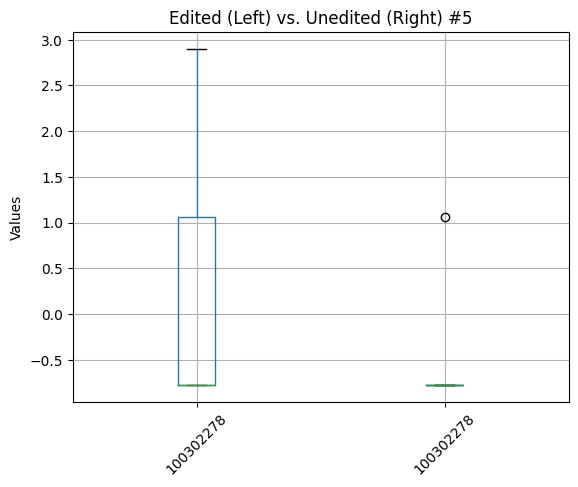

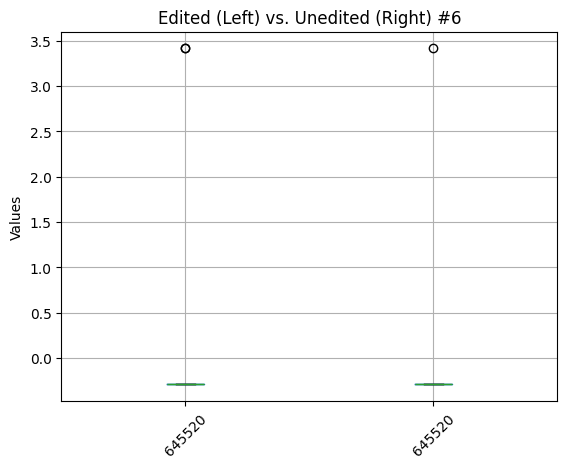

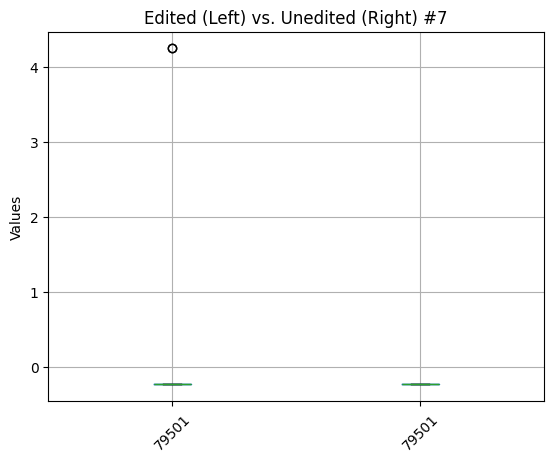

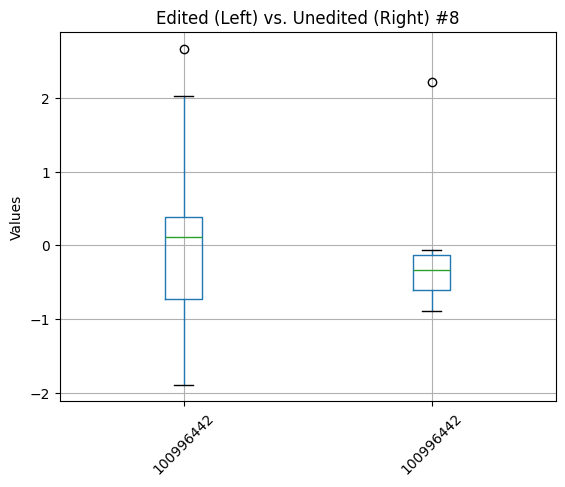

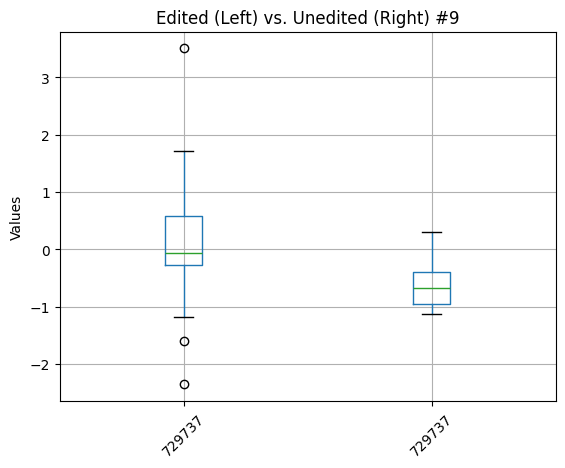

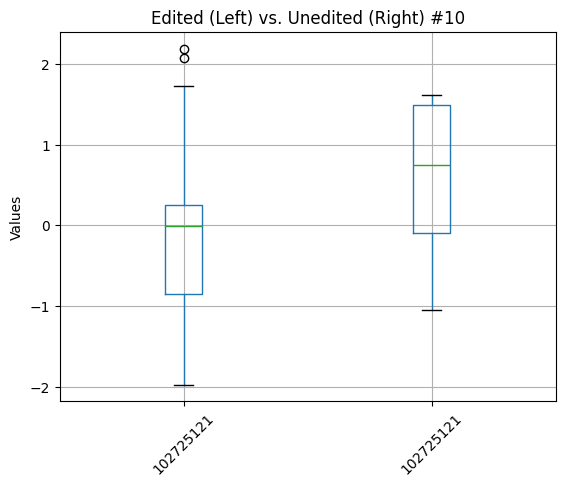

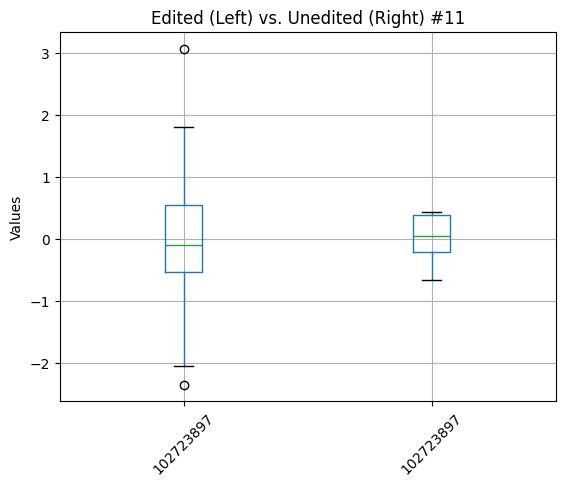

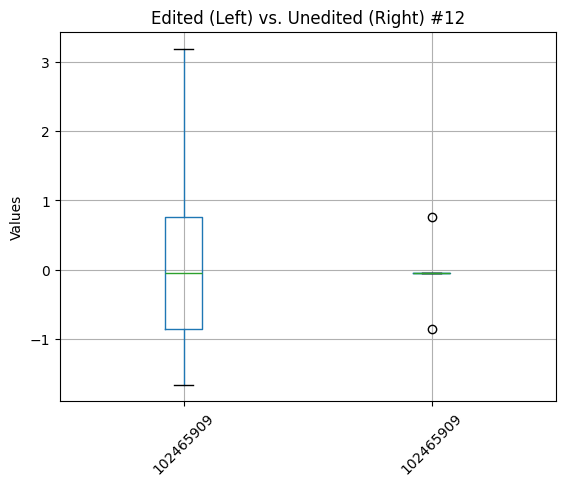

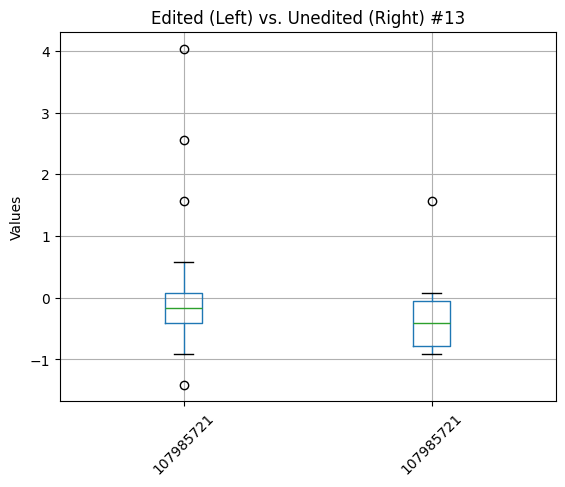

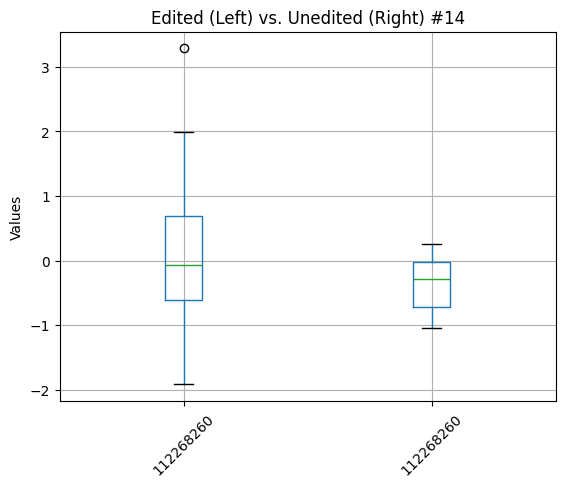

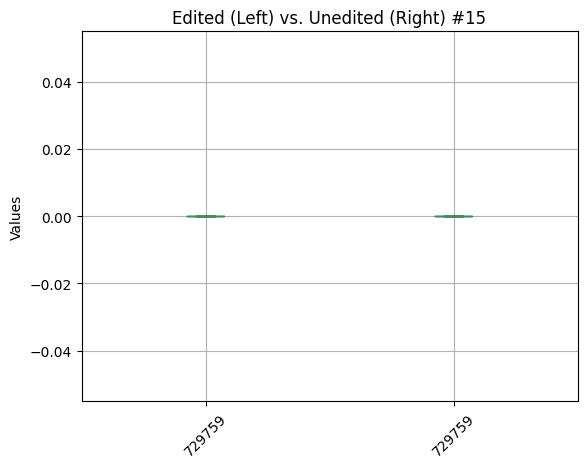

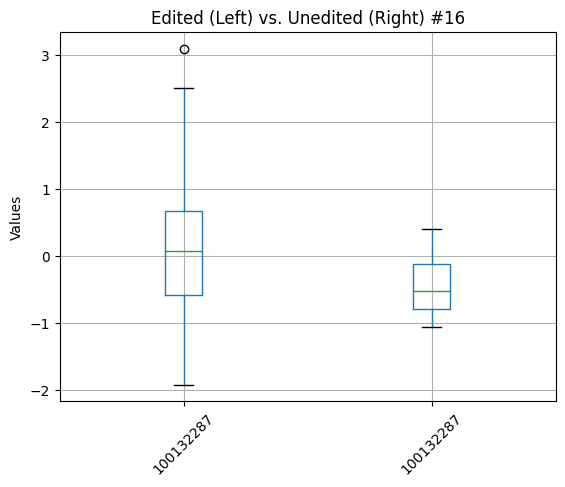

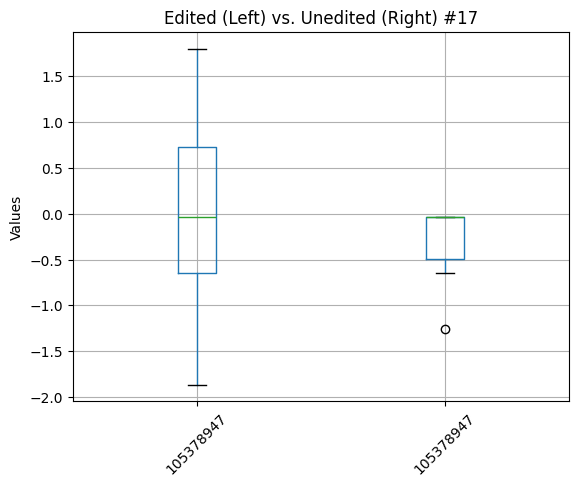

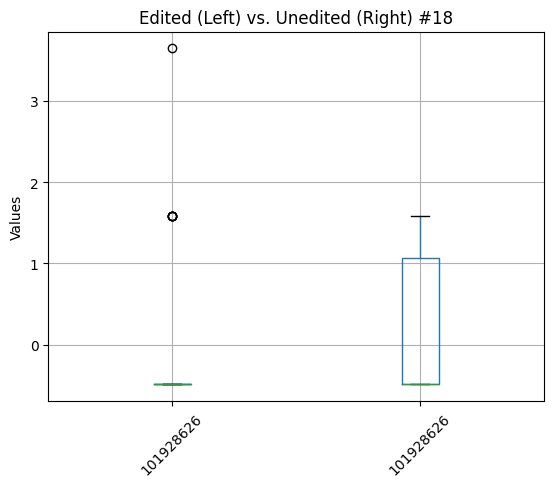

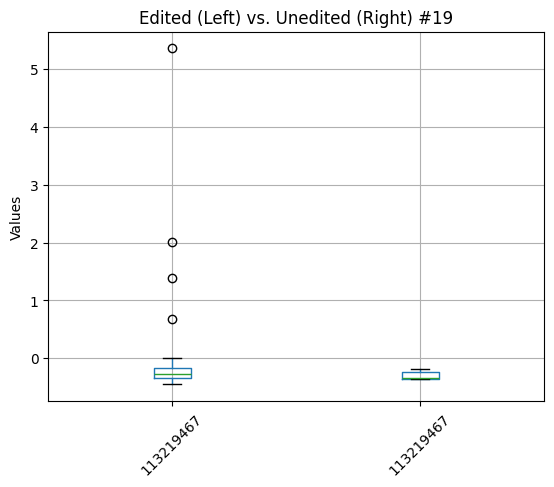

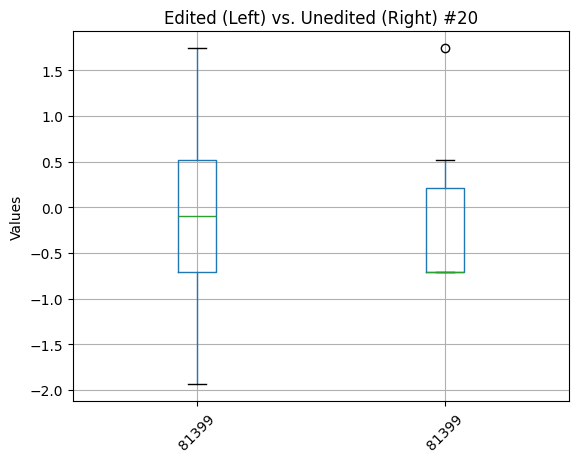

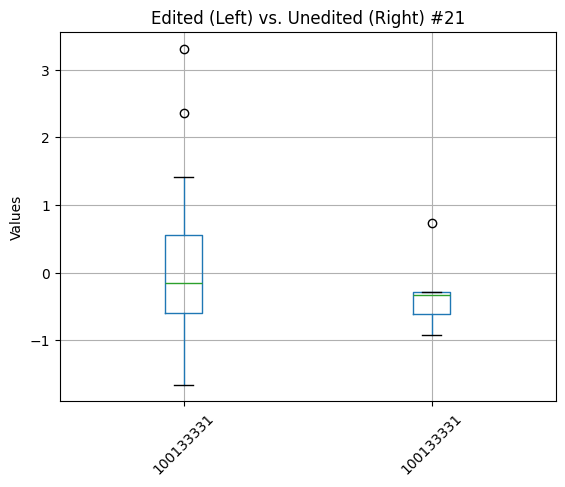

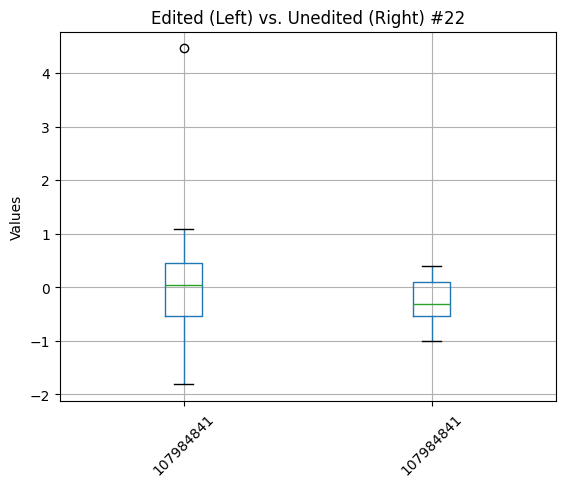

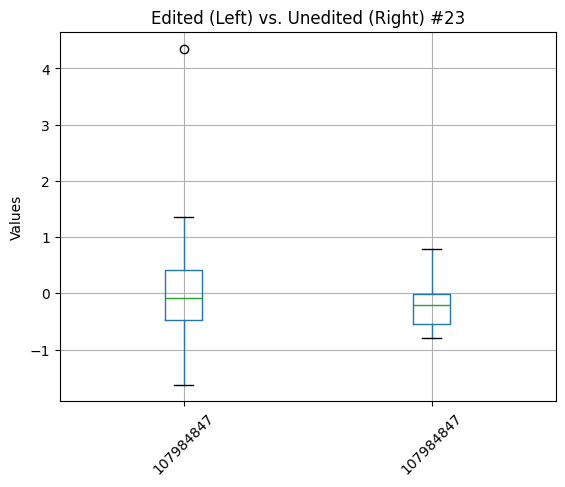

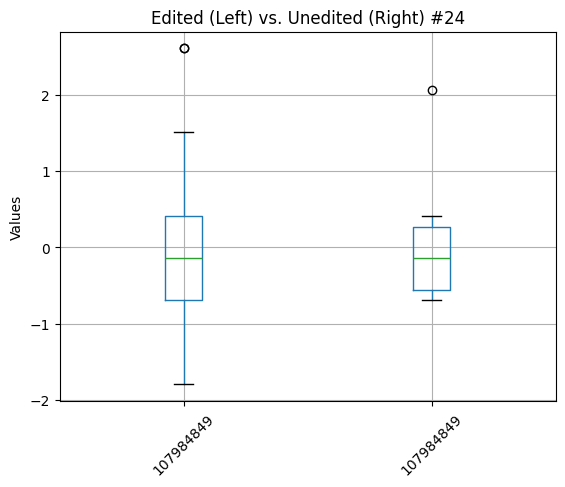

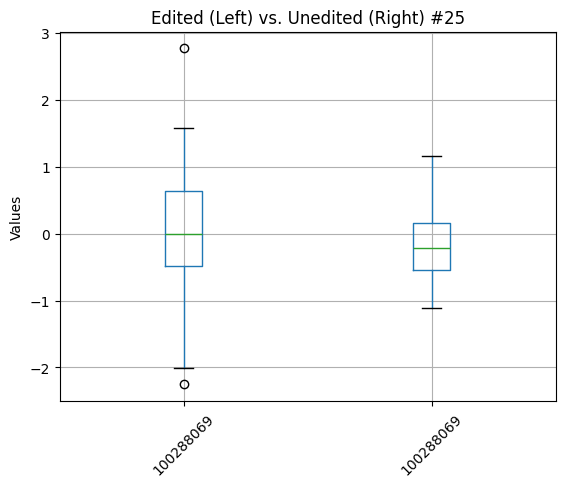

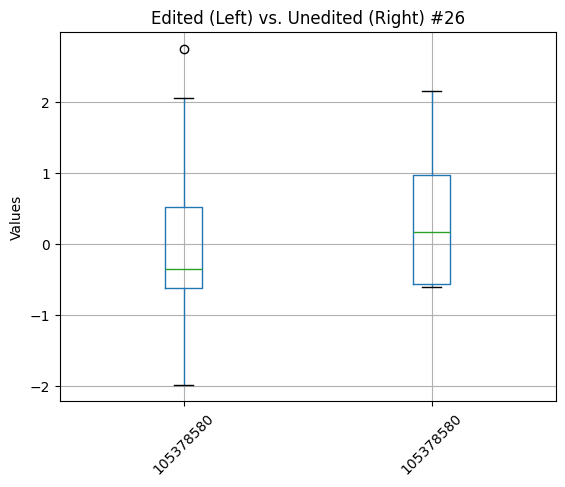

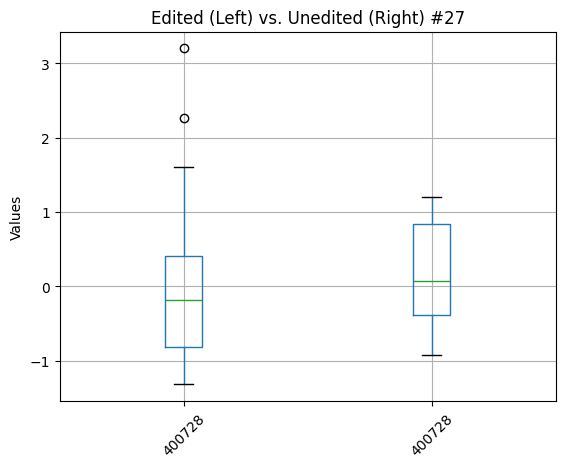

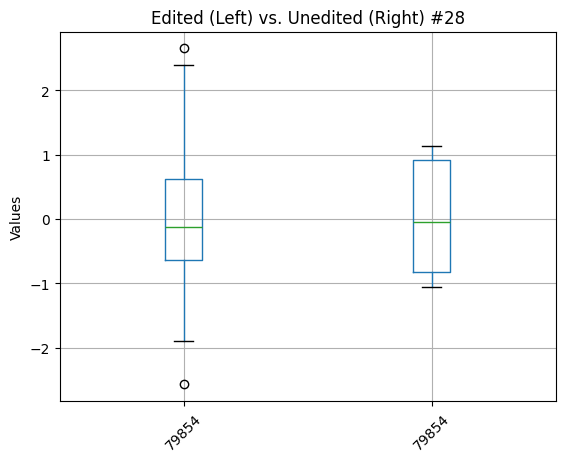

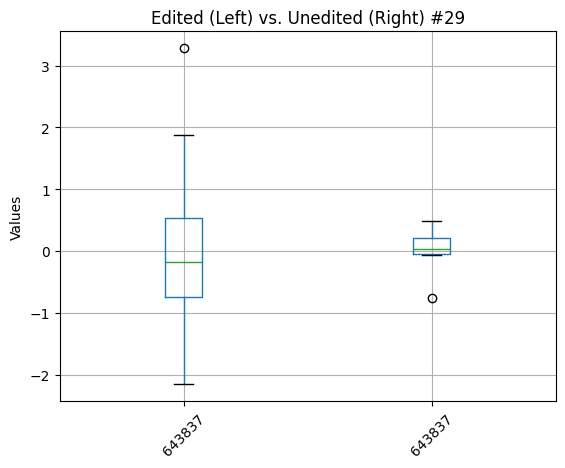

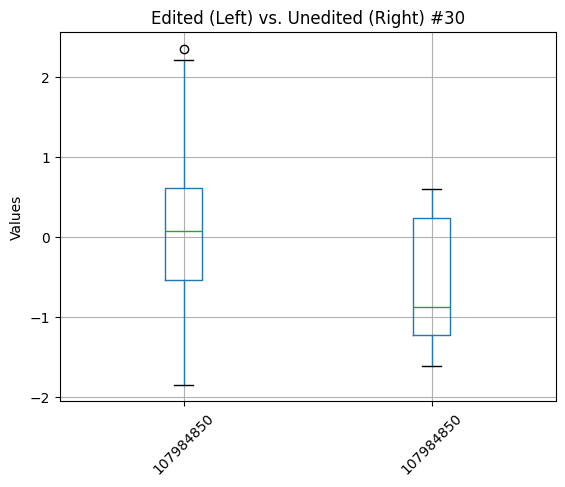

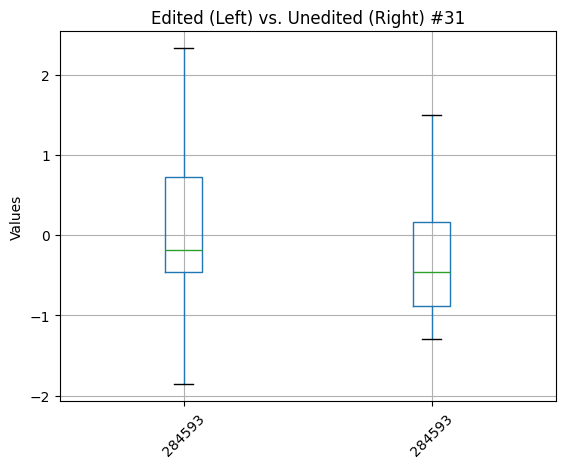

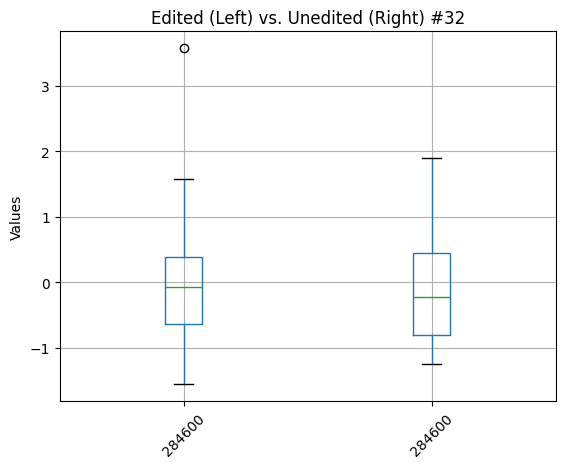

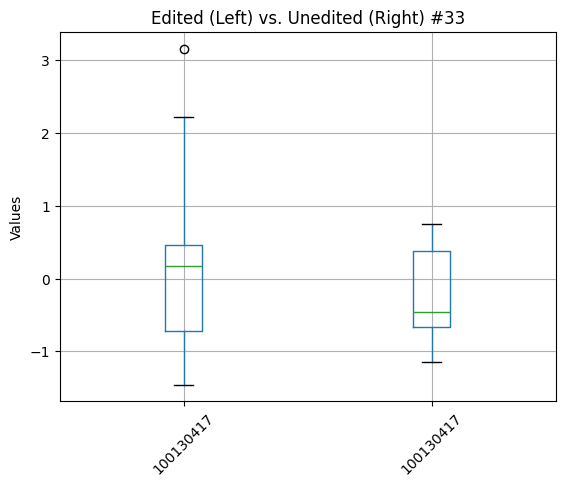

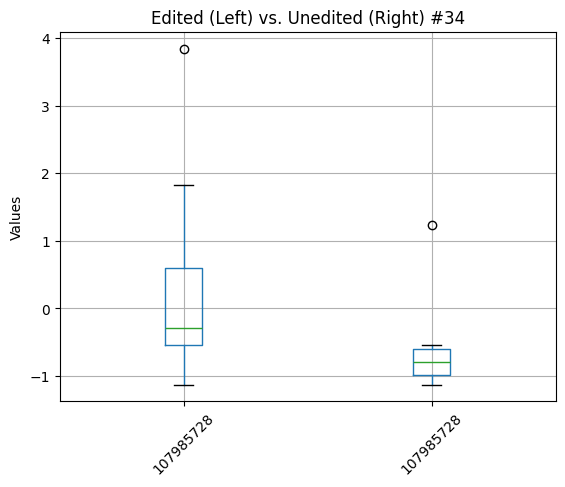

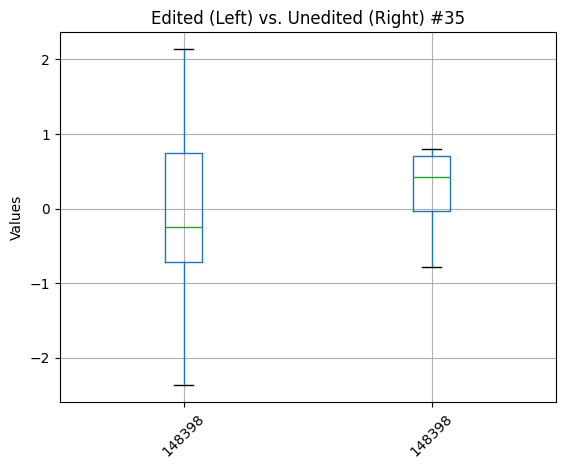

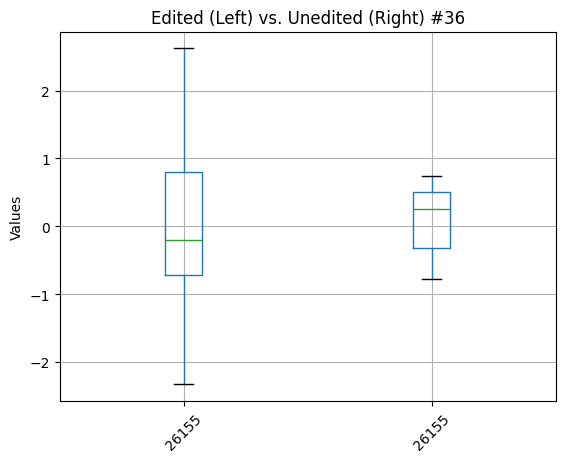

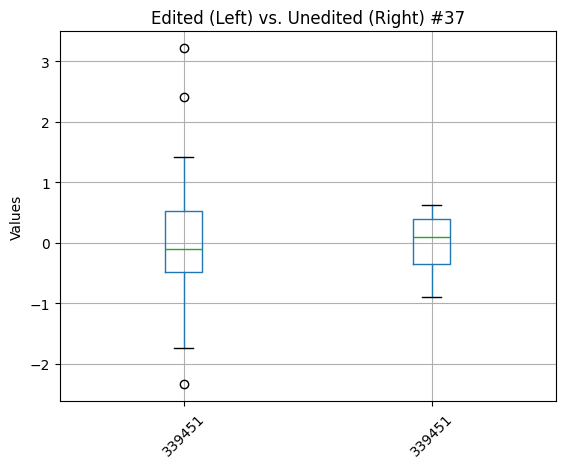

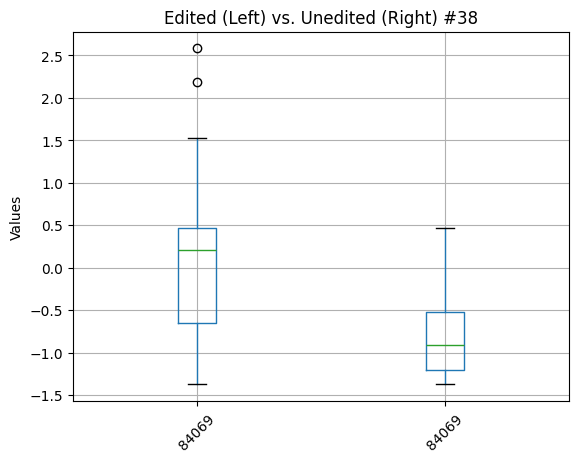

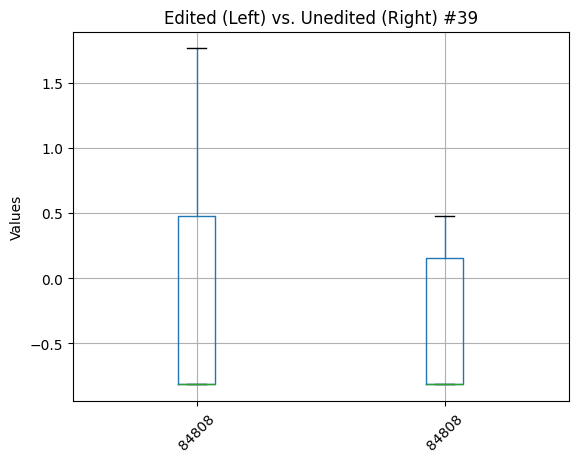

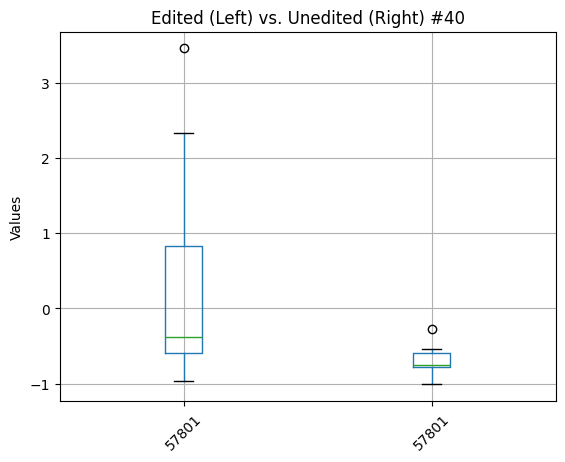

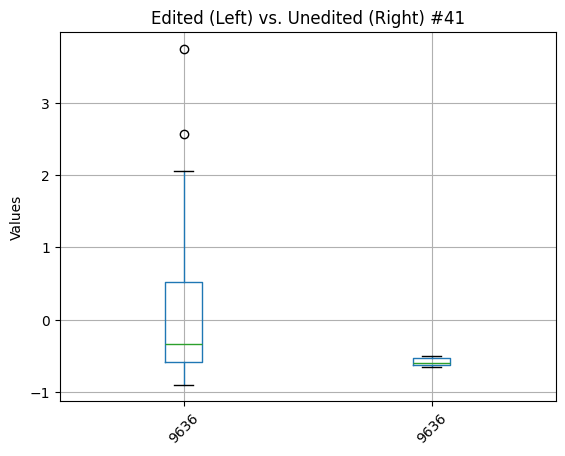

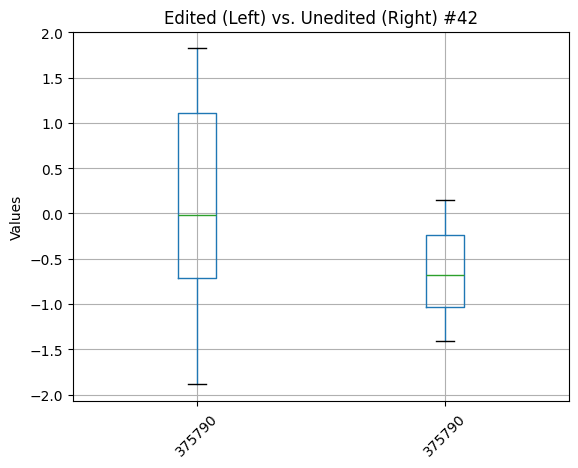

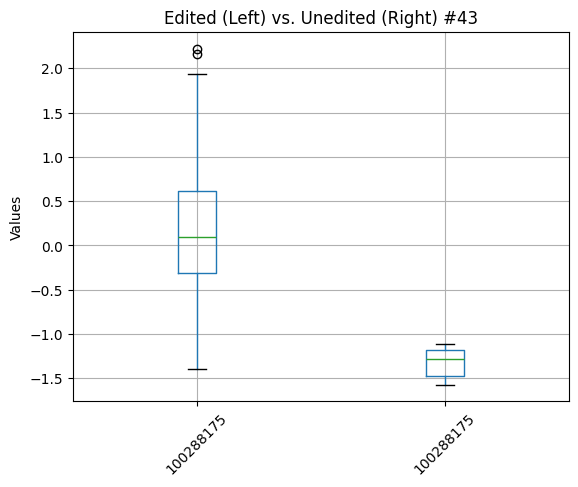

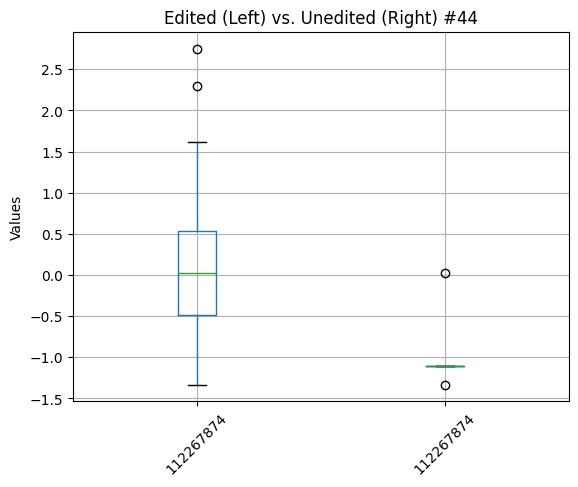

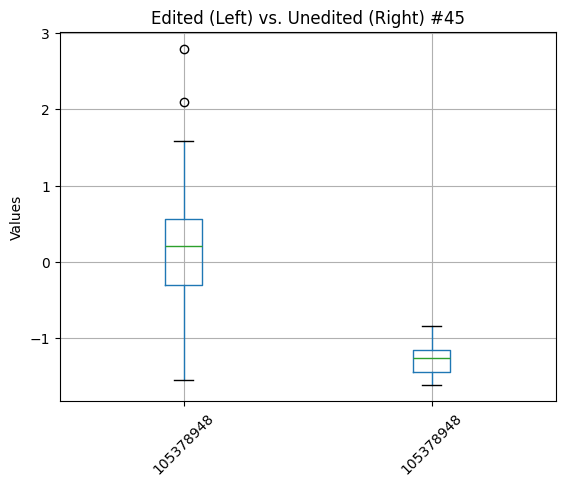

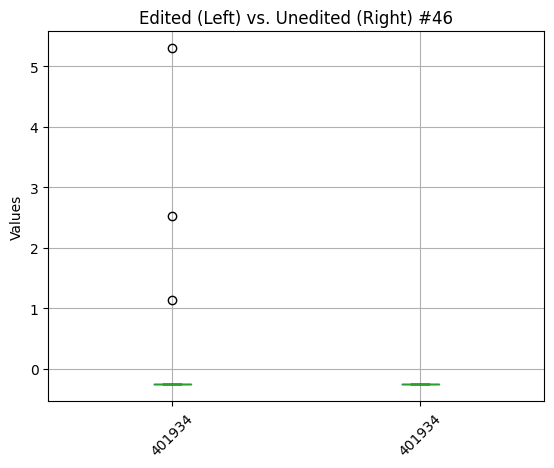

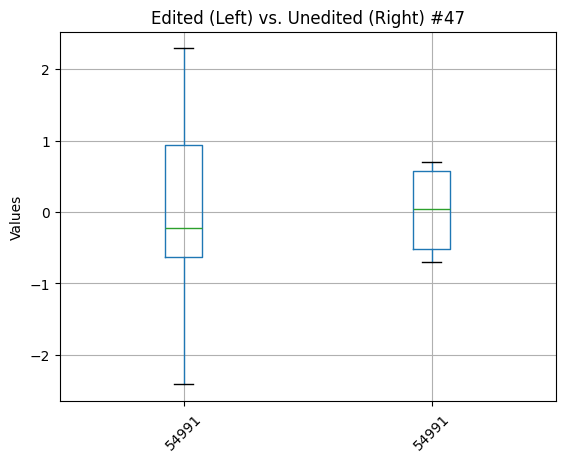

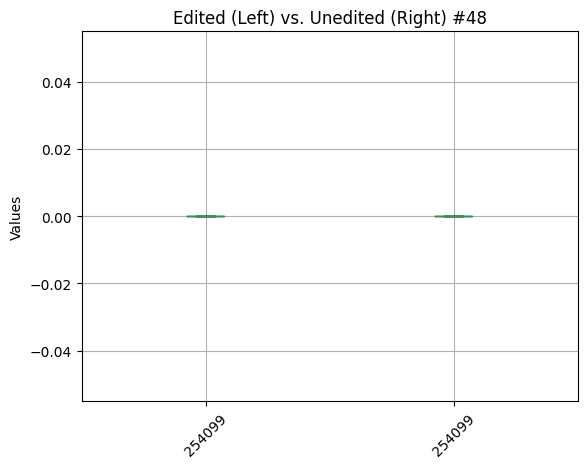

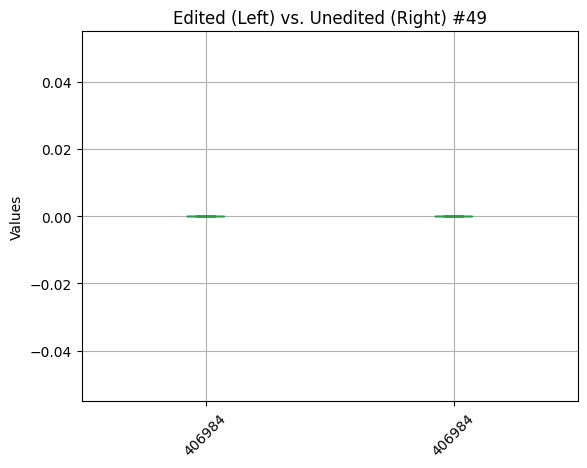

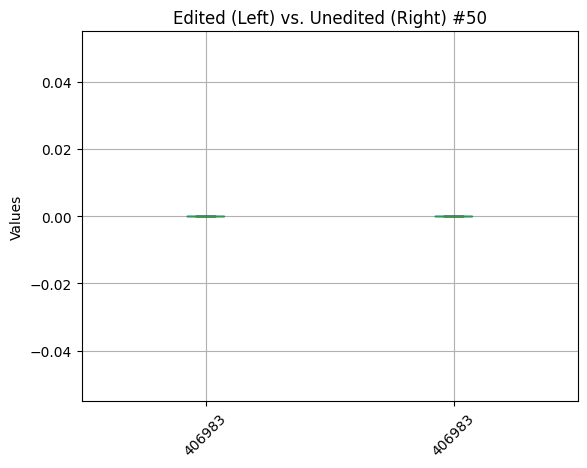

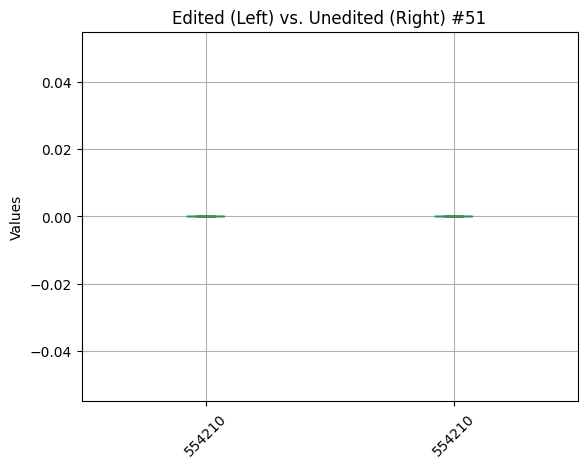

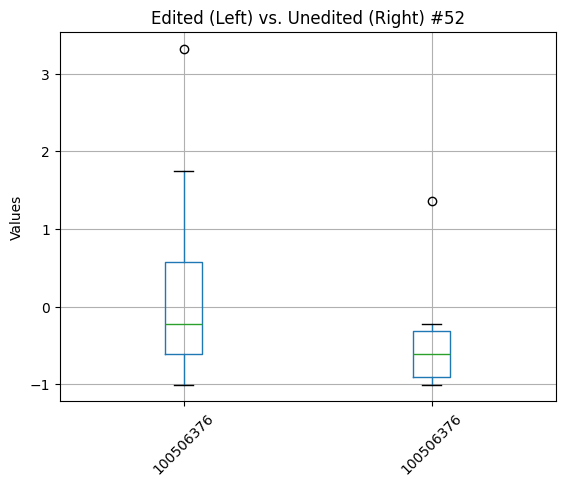

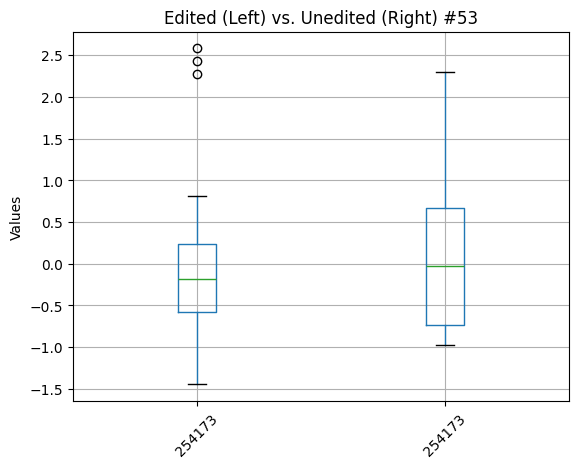

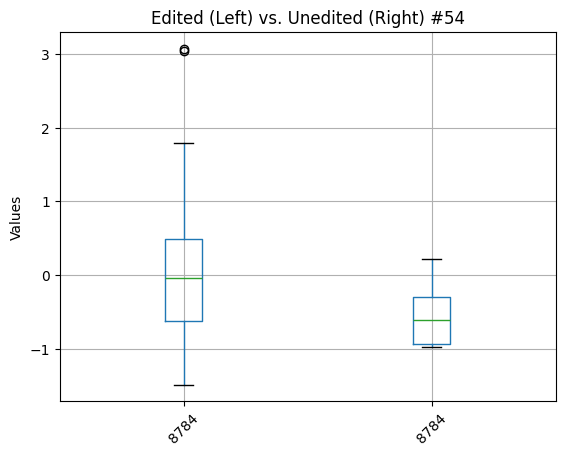

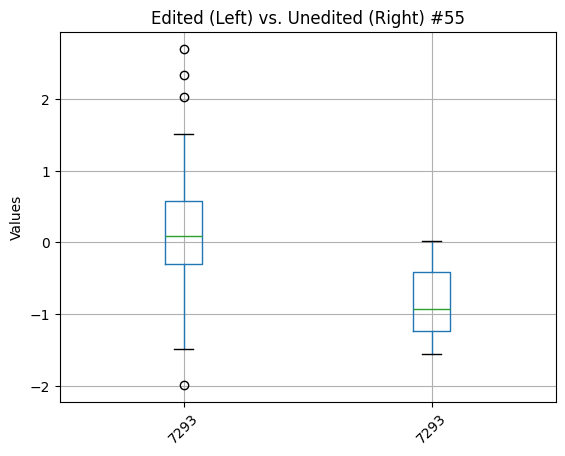

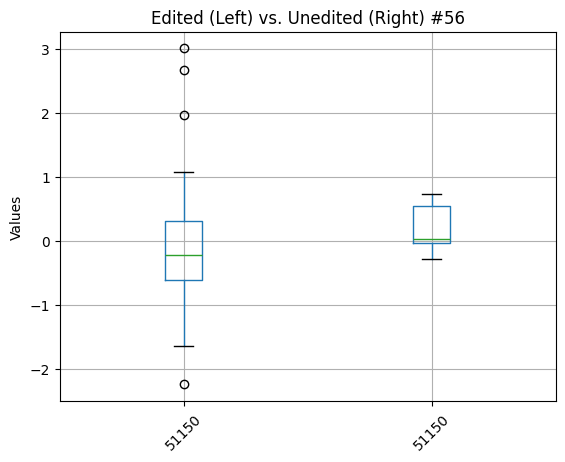

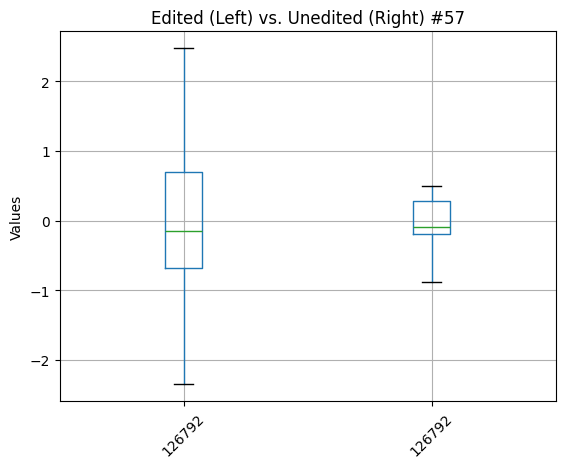

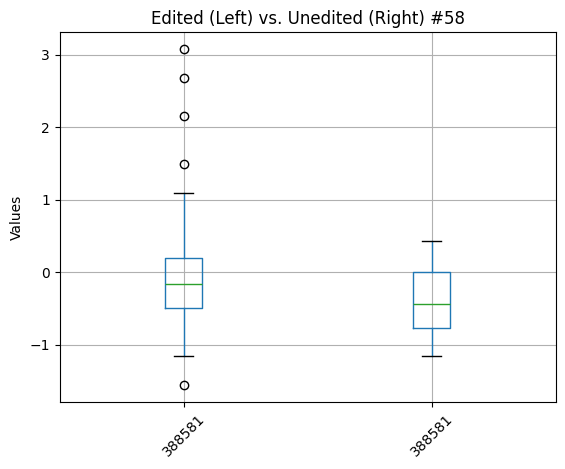

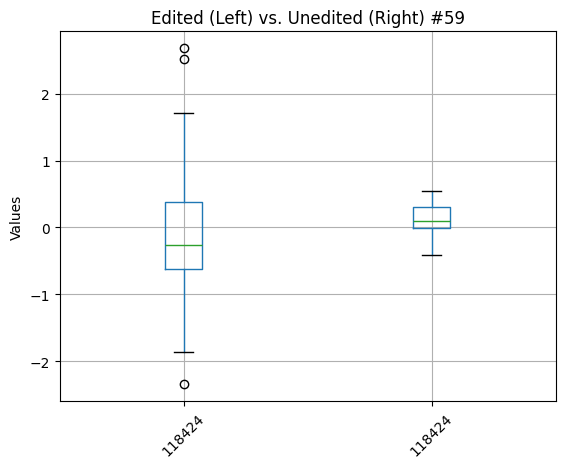

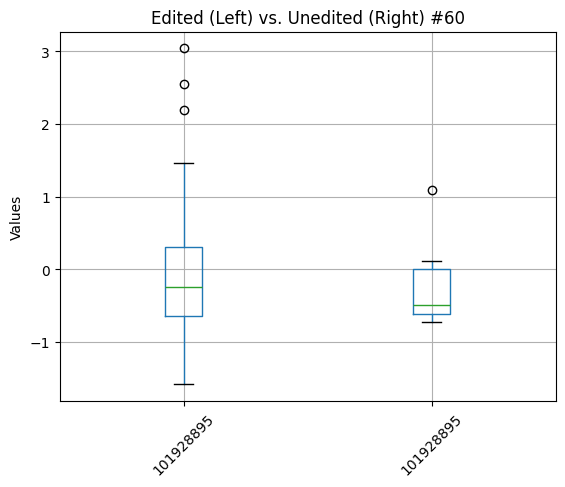

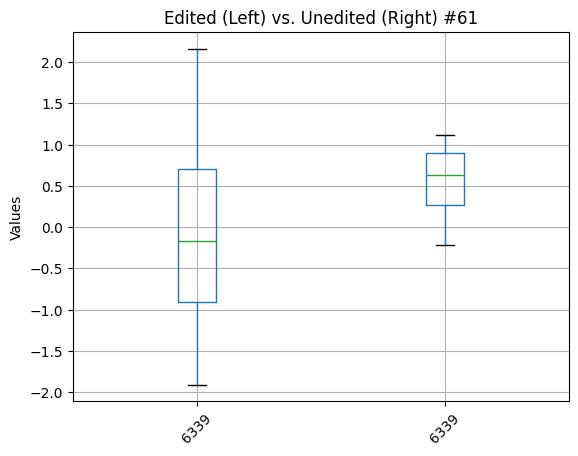

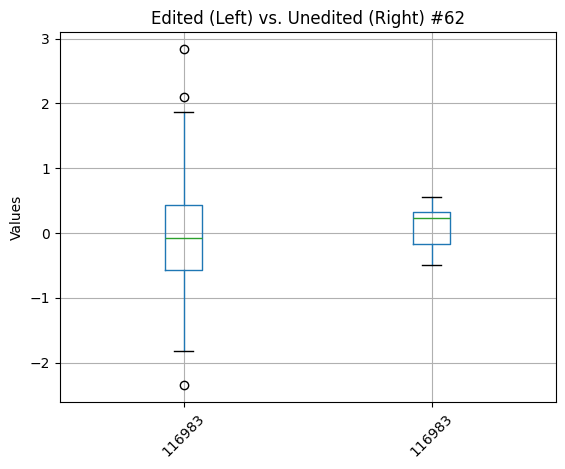

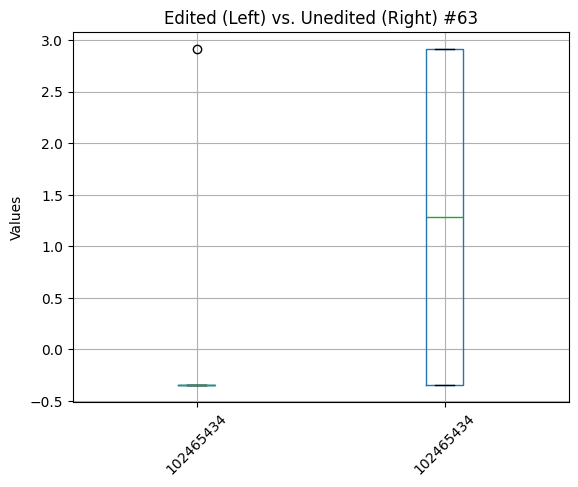

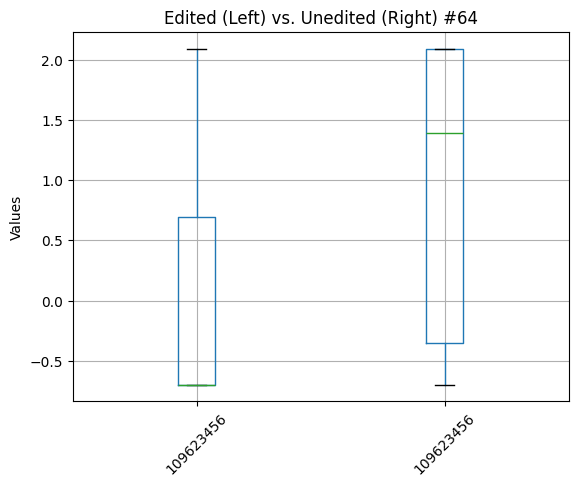

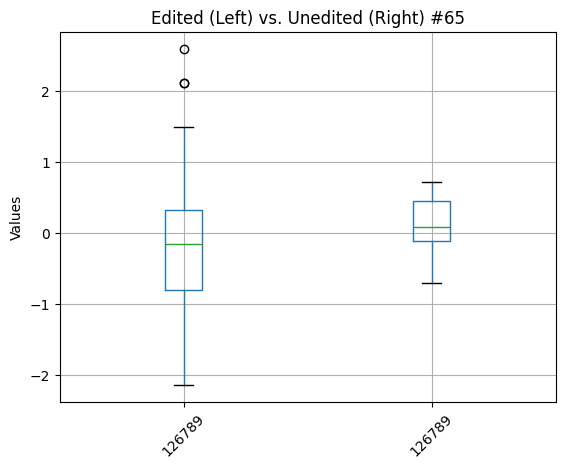

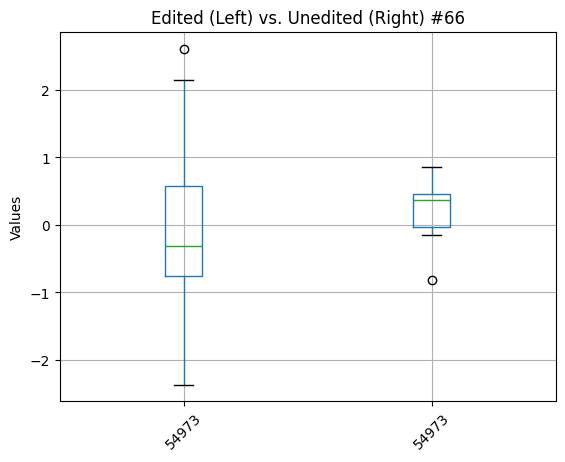

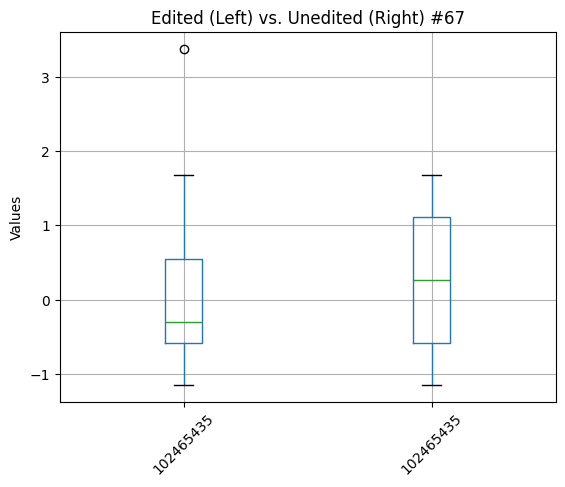

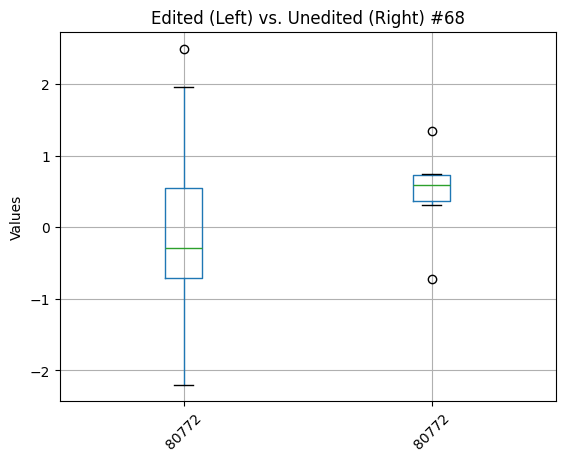

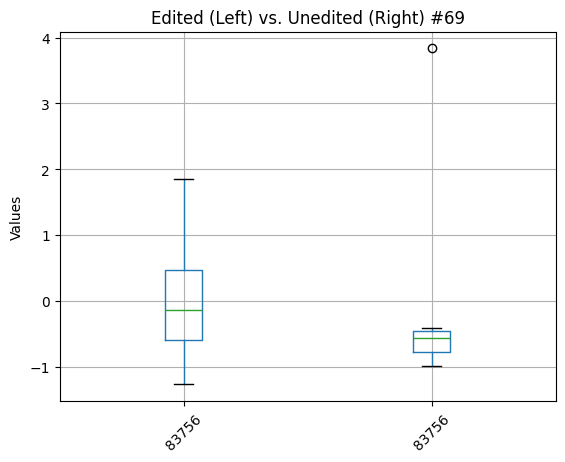

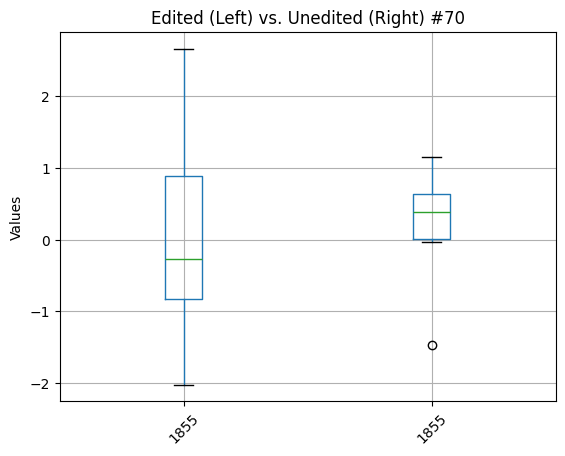

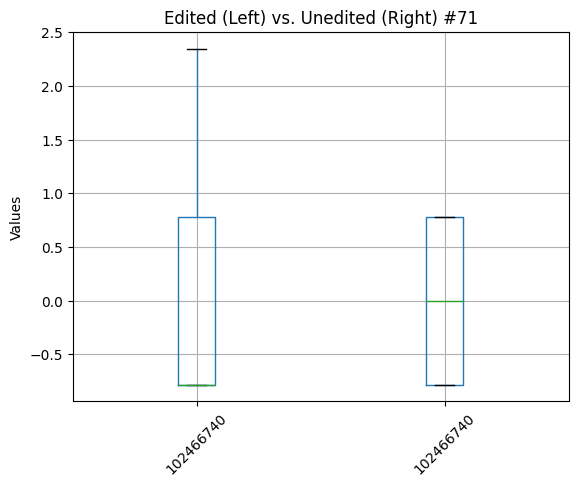

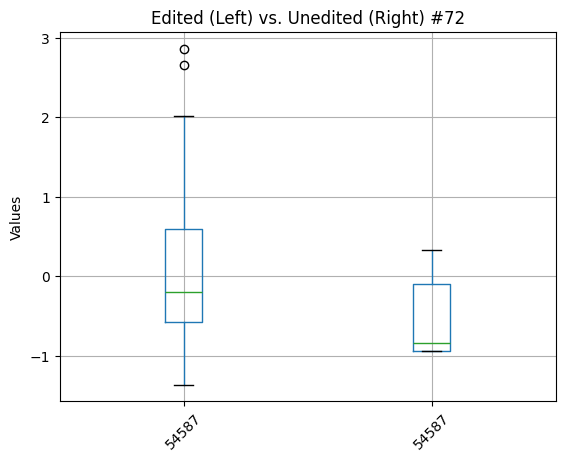

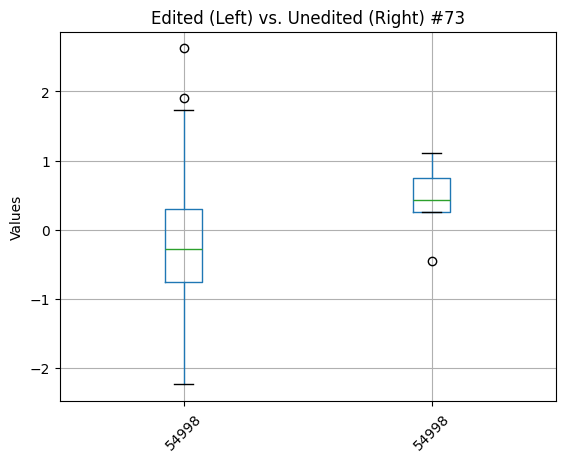

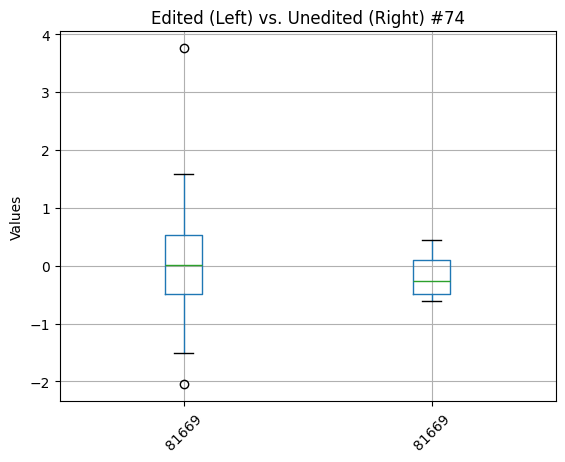

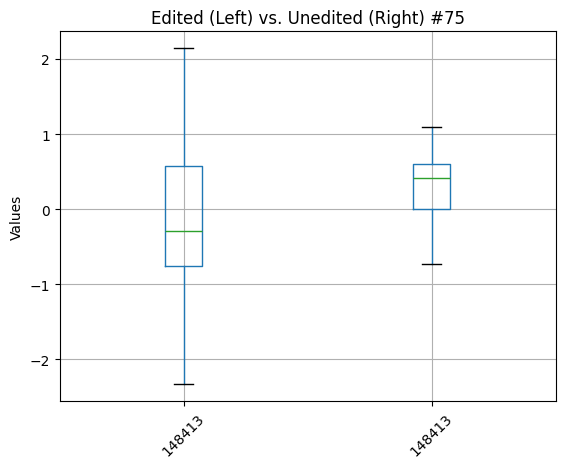

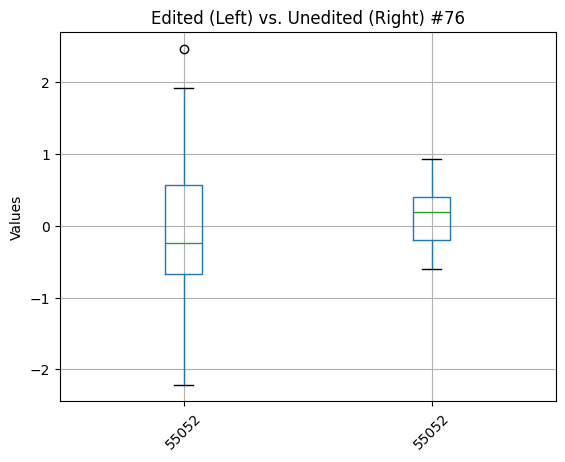

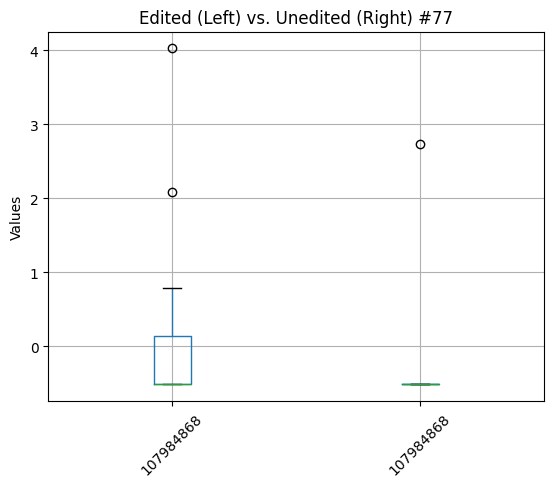

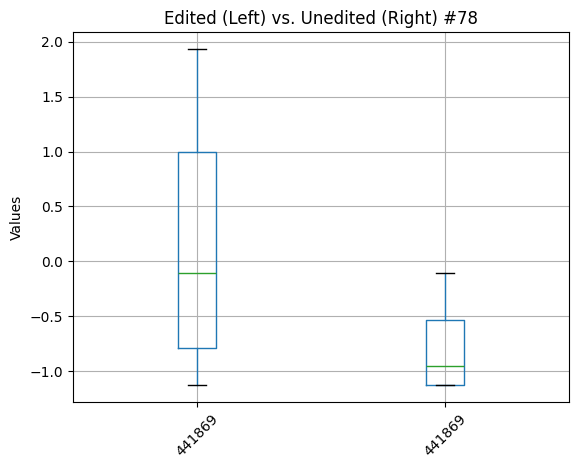

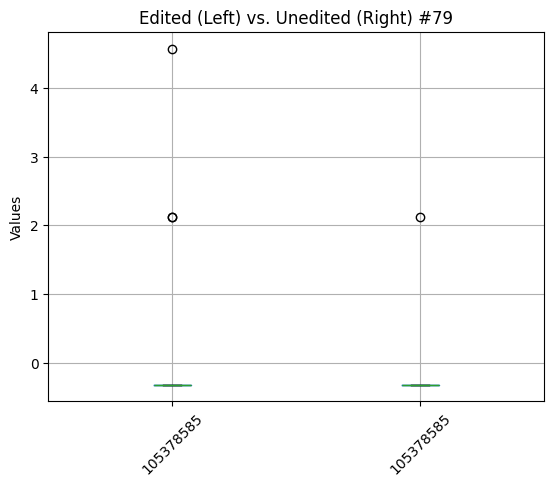

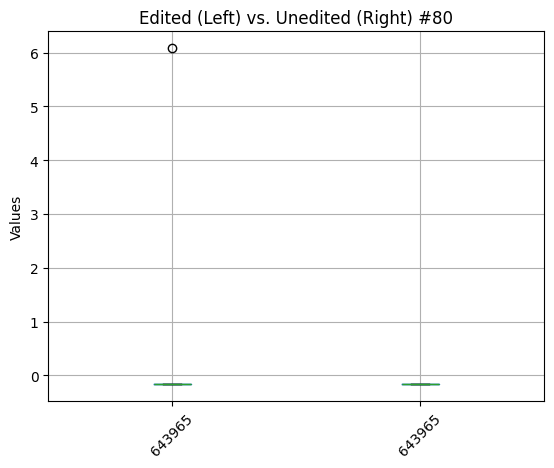

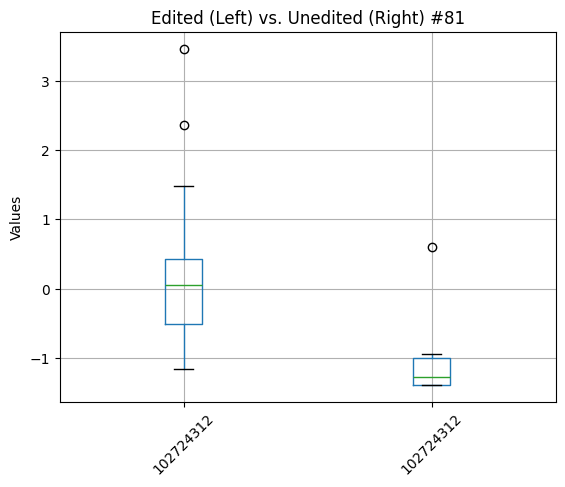

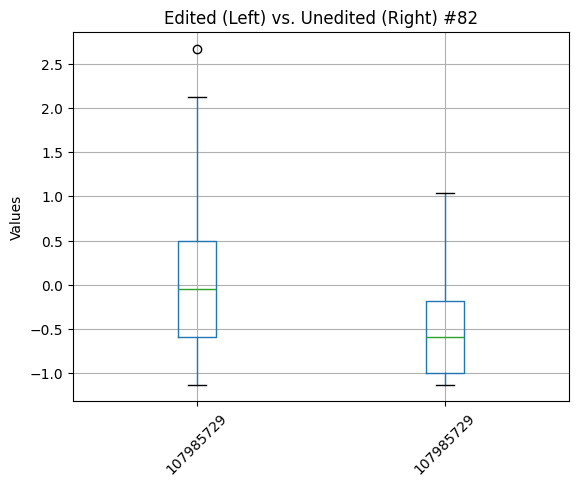

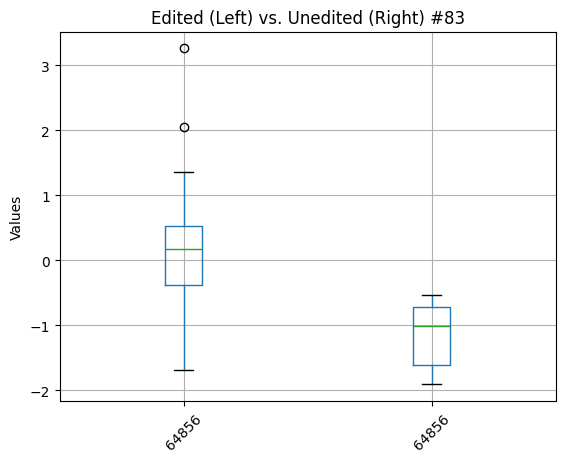

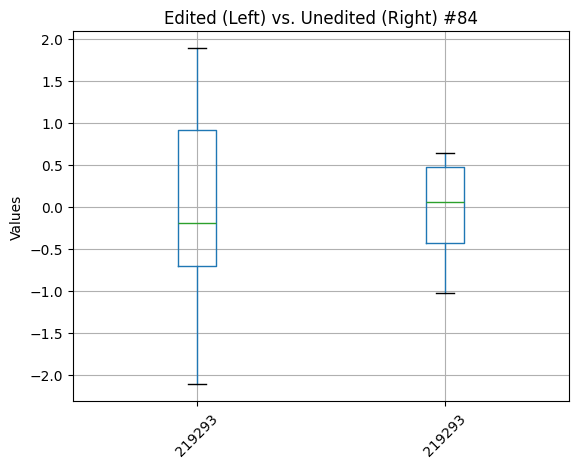

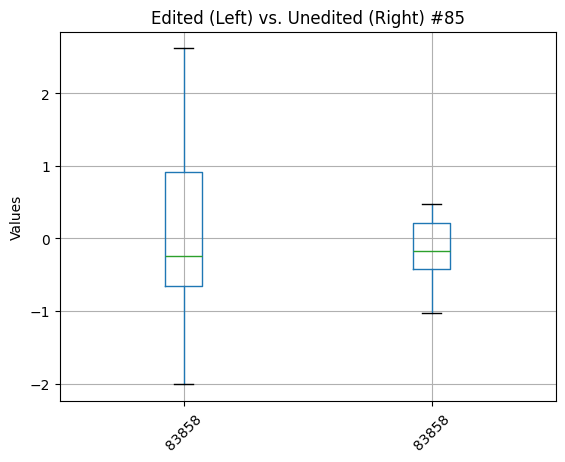

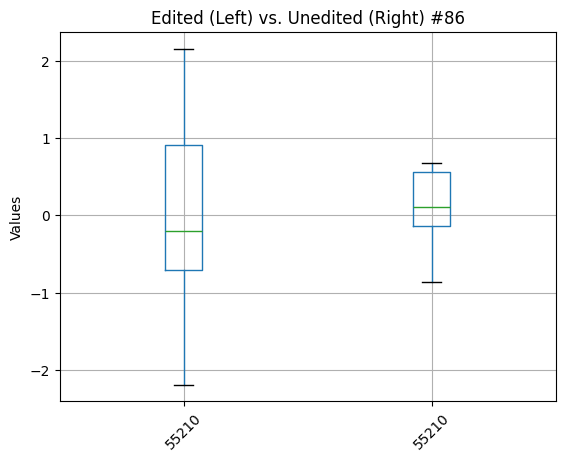

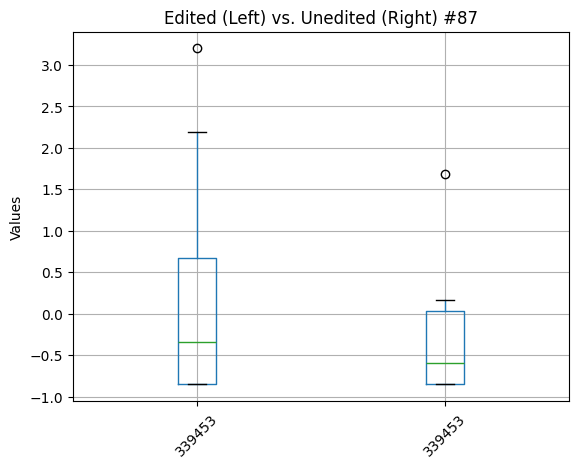

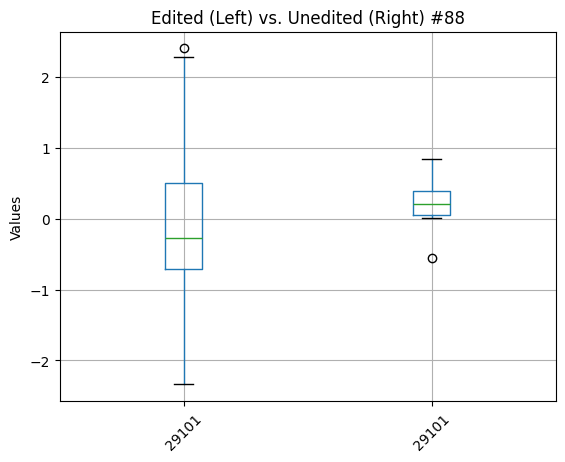

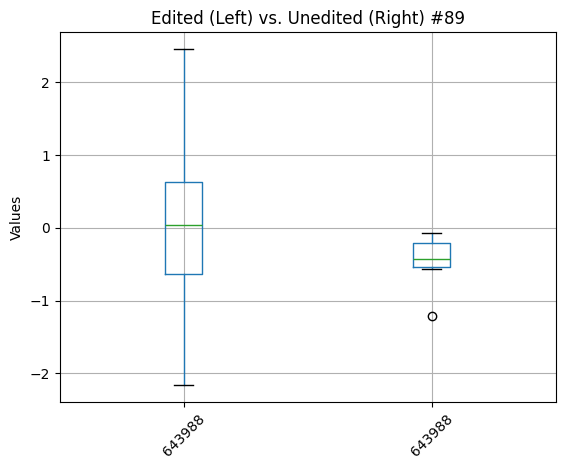

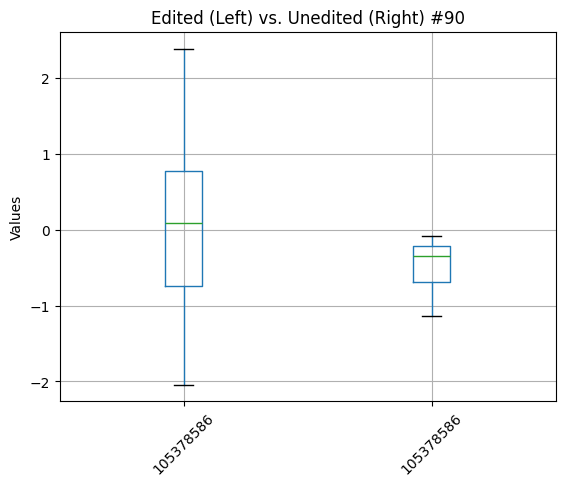

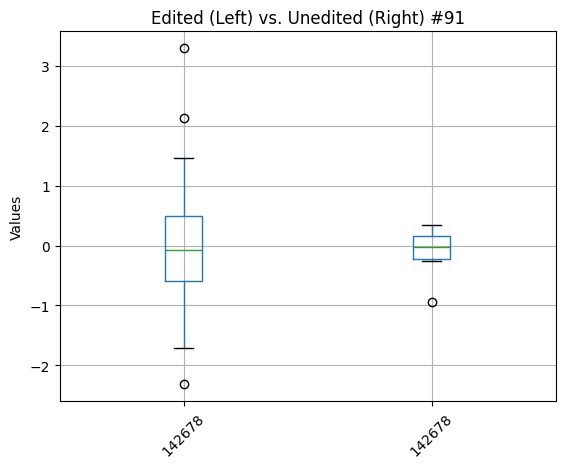

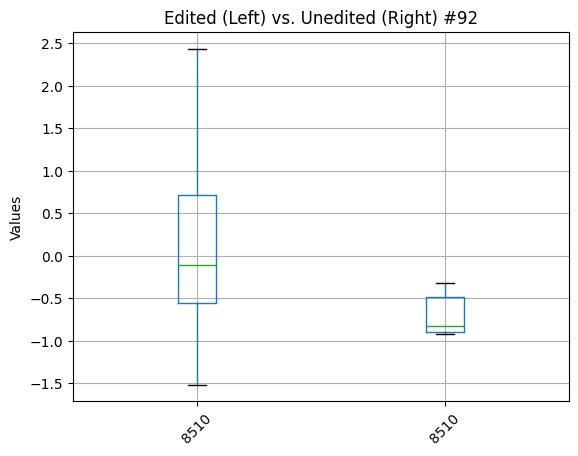

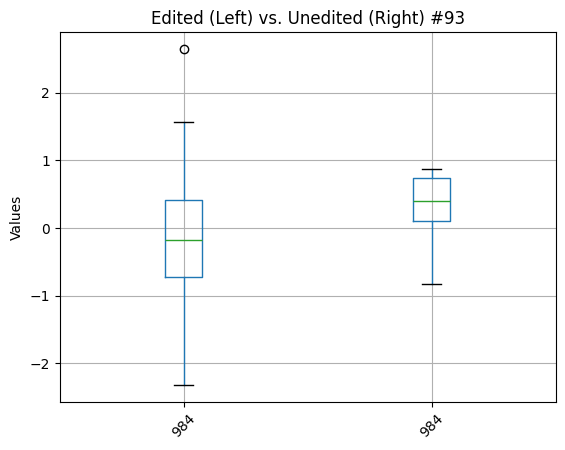

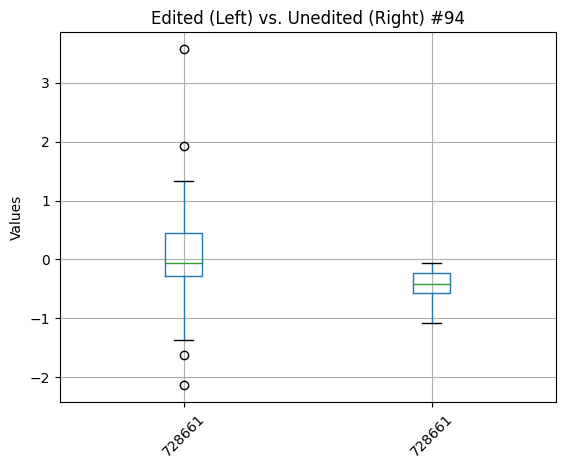

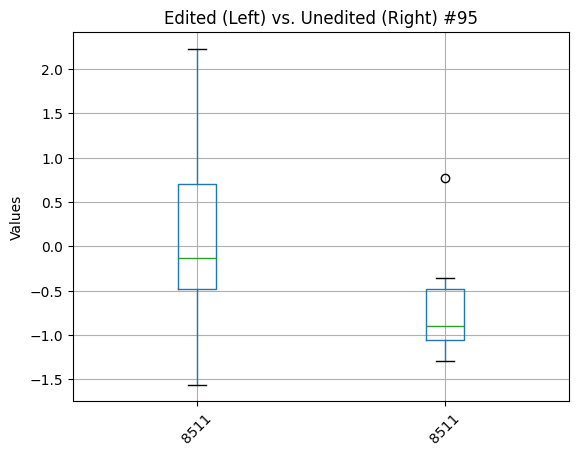

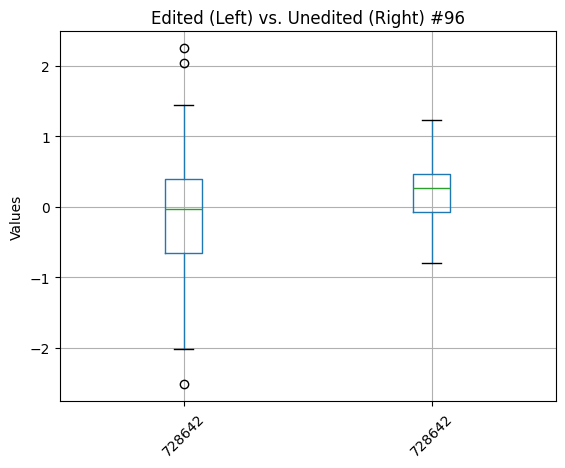

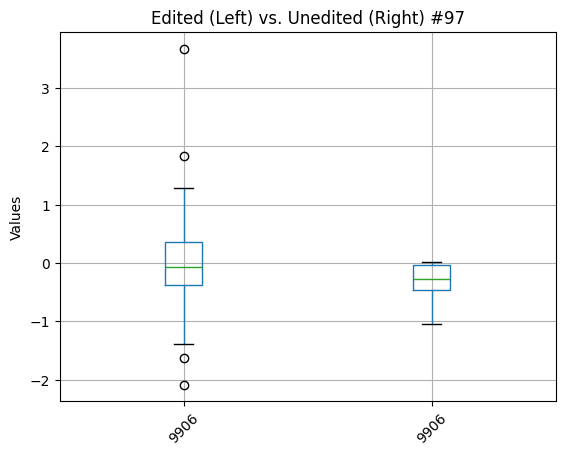

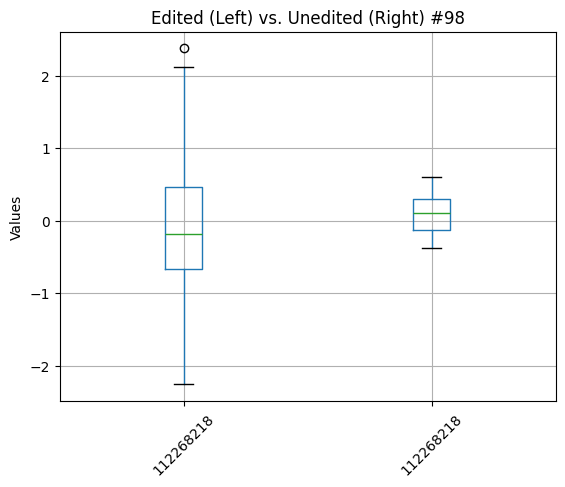

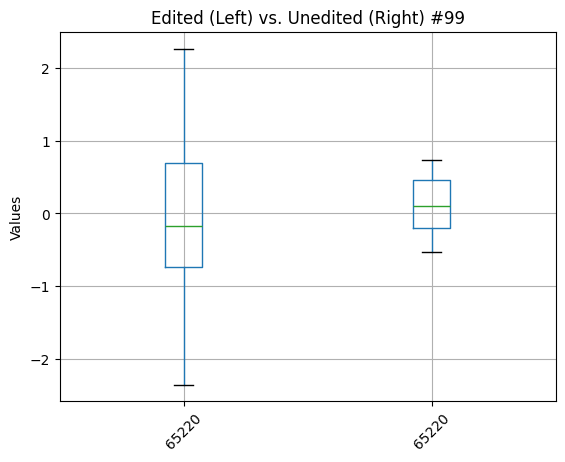

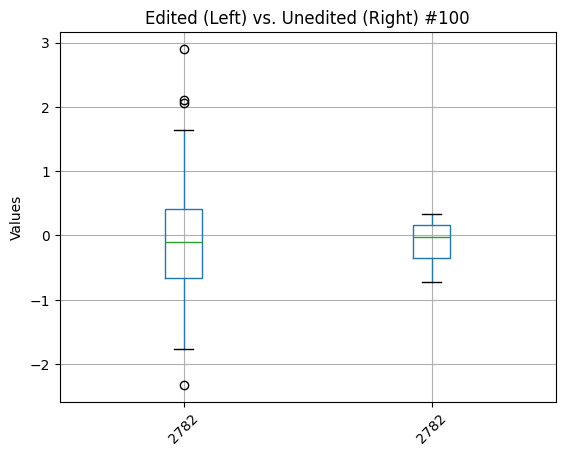

In [52]:
# for the subset of genes we picked above
for i in range(100):
  combined_df = pd.concat([df_edited.iloc[:, i:i+1], df_ut.iloc[:, i:i+1]], axis=1)

  # Create side-by-side boxplots to examine differences
  combined_df.boxplot()
  plt.title('Edited (Left) vs. Unedited (Right) #' + str(i+1))
  plt.ylabel('Values')
  plt.xticks(rotation=45)  # Rotate x labels for better visibility
  plt.show()

**Plots that looked most interesting:**




**4**

**5**

**12**

**18**

**29**

**34**

**38**

**41**

**43**

**44**

**45**

**55**

**63**

**64**

**68**

**77**

**78**

**81**








**Filtering for genes that are significant**

In [53]:
# box plots indicate clear differences for only SOME genes, use a numerical approach to determine which genes there are differences in
# this will help our classifier

# trying a range of conditions starting with a minimum median difference of 0.2 and a minimum standard deviation percent difference of 50%
# after each loop of filtering, increase the minimum median difference by 0.2 and/or the minimum standard deviation percent difference by 25%
min_median_difference = 0.2
median_step = 0.2
min_standard_deviation_percent_difference = 50
standard_deviation_step = 25

In [54]:
# separating edited and unedited to find differences
df_be4_full = scaled_df1.loc[mechanisms["BE4"]]
df_abe8_full = scaled_df1.loc[mechanisms["ABE8"]]
df_cas9_full = scaled_df1.loc[mechanisms["Cas9"]]
df_utelectro_full = scaled_df1.loc[mechanisms["Utelectro"]]
df_dcas9_full = scaled_df1.loc[mechanisms["dCas9"]]
df_be4alone_full = scaled_df1.loc[mechanisms["BE4alone"]]
df_abe8alone_full = scaled_df1.loc[mechanisms["ABE8alone"]]

df_edited_full = scaled_df1.loc[mechanisms["BE4"]+mechanisms["ABE8"]+mechanisms["Cas9"]+mechanisms["Utelectro"]+mechanisms["dCas9"]+mechanisms["BE4alone"]+mechanisms["ABE8alone"]]
df_ut_full = scaled_df1.loc[mechanisms["UT"]]

In [55]:
# trying range of conditions to filter genes
# minimum median difference goes from (0.2, 0.4, 0.6, ... 3.0)
# minimum standard deviation difference goes from (50%, 75%, 100%, ... 300%)
# if either condition is true, then it passes the filter


for j in range(15): # variable to modify median
  for k in range(11): # variable to modify standard deviation
    relevant_genes = []

    # loop through columns by index
    for i in range(len(scaled_df1.columns)):
      gene_name = scaled_df1.columns[i]
      col_data_edited = df_edited_full.iloc[:, i]
      col_data_ut = df_ut_full.iloc[:, i]

      # median and standard deviations of edited and unedited
      median_edited = col_data_edited.median()
      median_ut = col_data_ut.median()
      std_edited = col_data_edited.std()
      std_ut = col_data_ut.std()
      if abs(median_edited - median_ut) >= (min_median_difference + (j*median_step)) or (std_ut != 0 and std_edited/std_ut >= (1+(min_standard_deviation_percent_difference + (standard_deviation_step * k))/100)) or (std_edited != 0 and std_ut/std_edited >= (1+(min_standard_deviation_percent_difference + (standard_deviation_step * k))/100)):
        relevant_genes.append(gene_name)
    print("For median difference of " + str(min_median_difference + (j*median_step)) + " and standard deviation percent difference of " + str(min_standard_deviation_percent_difference + standard_deviation_step * k) + "%")
    print("Relevant Genes: " + str(len(relevant_genes))) # genes after filtering
    print("Total Columns: " + str(len(scaled_df1.columns))) # genes there were originally
    print("Columns Eliminated: " + str((len(scaled_df1.columns) - len(relevant_genes)))) # number of genes removed through the filter
    print()


For median difference of 0.2 and standard deviation percent difference of 50%
Relevant Genes: 26083
Total Columns: 39376
Columns Eliminated: 13293

For median difference of 0.2 and standard deviation percent difference of 75%
Relevant Genes: 24777
Total Columns: 39376
Columns Eliminated: 14599

For median difference of 0.2 and standard deviation percent difference of 100%
Relevant Genes: 23686
Total Columns: 39376
Columns Eliminated: 15690

For median difference of 0.2 and standard deviation percent difference of 125%
Relevant Genes: 22842
Total Columns: 39376
Columns Eliminated: 16534

For median difference of 0.2 and standard deviation percent difference of 150%
Relevant Genes: 21878
Total Columns: 39376
Columns Eliminated: 17498

For median difference of 0.2 and standard deviation percent difference of 175%
Relevant Genes: 21260
Total Columns: 39376
Columns Eliminated: 18116

For median difference of 0.2 and standard deviation percent difference of 200%
Relevant Genes: 20707
Total C

In [59]:
# filters data down to around 5000 relevant genes based on differences between edited and unedited gene expression
# first number in combination is the minimum median difference, second number is the median standard deviation percentage difference
# if either condition (median or standard deviation difference) is true, then add to combination

# combination 1: 1.2, 275%
# combination 2: 1.6, 250%
# combination 3: 3.0, 250%
combination1 = []
combination2 = []
combination3 = []
for i in range(len(scaled_df1.columns)):
      gene_name = scaled_df1.columns[i]
      col_data_edited = df_edited_full.iloc[:, i]
      col_data_ut = df_ut_full.iloc[:, i]

      # median and standard deviations of edited and unedited
      median_edited = col_data_edited.median()
      median_ut = col_data_ut.median()
      std_edited = col_data_edited.std()
      std_ut = col_data_ut.std()

      # combination 1: 1.2, 275%
      if abs(median_edited - median_ut) >= 1.2 or (std_ut != 0 and std_edited/std_ut >= 3.75) or (std_edited != 0 and std_ut/std_edited >= 3.75):
        combination1.append(gene_name)
print("For median difference of " + str(1.2) + " and standard deviation percent difference of " + str(275) + "%")
print("Relevant Genes: " + str(len(combination1)))


for i in range(len(scaled_df1.columns)):
      gene_name = scaled_df1.columns[i]
      col_data_edited = df_edited_full.iloc[:, i]
      col_data_ut = df_ut_full.iloc[:, i]

      # median and standard deviations of edited and unedited
      median_edited = col_data_edited.median()
      median_ut = col_data_ut.median()
      std_edited = col_data_edited.std()
      std_ut = col_data_ut.std()

      # combination 2: 1.6, 250%
      if abs(median_edited - median_ut) >= 1.6 or (std_ut != 0 and std_edited/std_ut >= 3.50) or (std_edited != 0 and std_ut/std_edited >= 3.50):
        combination2.append(gene_name)
print("For median difference of " + str(1.6) + " and standard deviation percent difference of " + str(250) + "%")
print("Relevant Genes: " + str(len(combination2)))


for i in range(len(scaled_df1.columns)):
      gene_name = scaled_df1.columns[i]
      col_data_edited = df_edited_full.iloc[:, i]
      col_data_ut = df_ut_full.iloc[:, i]

      # median and standard deviations of edited and unedited
      median_edited = col_data_edited.median()
      median_ut = col_data_ut.median()
      std_edited = col_data_edited.std()
      std_ut = col_data_ut.std()

      # combination 3: 3.0, 250%
      if abs(median_edited - median_ut) >= 3 or (std_ut != 0 and std_edited/std_ut >= 3.50) or (std_edited != 0 and std_ut/std_edited >= 3.50):
        combination3.append(gene_name)
print("For median difference of " + str(3) + " and standard deviation percent difference of " + str(250) + "%")
print("Relevant Genes: " + str(len(combination3)))

For median difference of 1.2 and standard deviation percent difference of 275%
Relevant Genes: 4122
For median difference of 1.6 and standard deviation percent difference of 250%
Relevant Genes: 4188
For median difference of 3 and standard deviation percent difference of 250%
Relevant Genes: 4050


In [60]:
# writing combinations to csv file
file_path1 = "data/5000 Gene Combinations/relevant_genes_1.2_275.txt"
with open(file_path1, mode = "w", newline='') as file:
  writer = csv.writer(file)
  writer.writerow(combination1)

file_path2 = "data/5000 Gene Combinations/relevant_genes_1.6_250.txt"
with open(file_path2, mode = "w", newline='') as file:
  writer = csv.writer(file)
  writer.writerow(combination2)

file_path3 = "data/5000 Gene Combinations/relevant_genes_3.0_250.txt"
with open(file_path3, mode = "w", newline='') as file:
  writer = csv.writer(file)
  writer.writerow(combination3)

In [62]:
# reads the data we have saved in csv file and stores it in a list
import csv
with open('data/5000 Gene Combinations/relevant_genes_1.2_275.txt', 'r') as file:
    reader = csv.reader(file)
    combination1 = [item for row in reader for item in row] # stores file in list

with open('data/5000 Gene Combinations/relevant_genes_1.6_250.txt', 'r') as file:
    reader = csv.reader(file)
    combination2 = [item for row in reader for item in row] # stores file in list

with open('data/5000 Gene Combinations/relevant_genes_3.0_250.txt', 'r') as file:
    reader = csv.reader(file)
    combination3 = [item for row in reader for item in row] # stores file in list


combination1 = [int(col) for col in combination1]
combination2 = [int(col) for col in combination2]
combination3 = [int(col) for col in combination3]

In [63]:
# shows how much we filtered the dataset (how many genes are left after filtering) using three different combinations
print(len(combination1))
print(len(combination2))
print(len(combination3))

4122
4188
4050


In [9]:
# classifier
unedited = ['GSM6745632', 'GSM6745633', 'GSM6745634', 'GSM6745635', 'GSM6745636', 'GSM6745637']
scaled_df1['Edited (1) or Unedited (0)'] = scaled_df1.index.map(lambda gene: 0 if gene in unedited else 1)
y = scaled_df1['Edited (1) or Unedited (0)']

In [ ]:
# ONLY using classification for the selected set of genes
# X_1 = scaled_df1[combination1]
X_1 = scaled_df1[combination2]
# X_1 = scaled_df1[combination3]

In [16]:
# random forest classifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier



# Define the range of estimators and max_depth values
#estimators = [10, 30, 50, 95]
estimators = [50, 95]
max_depths = [None, 1, 2, 3]  # 'None' allows the tree to grow without restriction

k_value = 5

# Nested loop to vary both estimators and max_depth
for est in estimators:
    for depth in max_depths:
        # Define the model with specific n_estimators and max_depth
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=42)

        # Perform Stratified K-Fold cross-validation
        skf = StratifiedKFold(n_splits=k_value, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_1, y, cv=skf, scoring='accuracy')

        # Results
        depth_info = "None" if depth is None else str(depth)
        print(f"For {est} estimators and max_depth={depth_info}")
        print(f"Accuracy scores for each fold: {scores}")
        print(f"Mean accuracy: {scores.mean()}")
        print(f"Standard deviation: {scores.std()}")

For 50 estimators and max_depth=None
Accuracy scores for each fold: [1.    0.875 1.    1.    1.   ]
Mean accuracy: 0.975
Standard deviation: 0.049999999999999996
For 50 estimators and max_depth=1
Accuracy scores for each fold: [1.    0.875 1.    1.    1.   ]
Mean accuracy: 0.975
Standard deviation: 0.049999999999999996
For 50 estimators and max_depth=2
Accuracy scores for each fold: [1.    0.875 1.    1.    1.   ]
Mean accuracy: 0.975
Standard deviation: 0.049999999999999996
For 50 estimators and max_depth=3
Accuracy scores for each fold: [1.    0.875 1.    1.    1.   ]
Mean accuracy: 0.975
Standard deviation: 0.049999999999999996
For 95 estimators and max_depth=None
Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0
For 95 estimators and max_depth=1
Accuracy scores for each fold: [1.    0.875 1.    1.    1.   ]
Mean accuracy: 0.975
Standard deviation: 0.049999999999999996
For 95 estimators and max_depth=2
Accuracy scores for each fold: [1. 1. 1.

In [20]:
# lgboost classifier
import lightgbm as lgb


k_value = 5


# Parameters to search over
leaf_iter = [100, 300, 500, 800]
max_depths = [None, 1, 3, 5]
learnRate = [0.01, 0.05, 0.1, 0.5]
for leaf in leaf_iter:
  for depth in max_depths:
    for rate in learnRate:
      model = lgb.LGBMClassifier(num_leaves = leaf, max_depth = depth, learning_rate = rate, random_state=42, verbose = -1)
      skf = StratifiedKFold(n_splits=k_value, shuffle=True, random_state=42)

      # Using cross_val_score to evaluate the model
      scores = cross_val_score(model, X_1, y, cv=skf, scoring='accuracy')

      # Results
      depth_info = "None" if depth is None else str(depth)
      print(f"For {leaf} leafs and max_depth={depth_info} and learning rate={rate}")
      print(f"Accuracy scores for each fold: {scores}")
      print(f"Mean accuracy: {scores.mean()}")
      print(f"Standard deviation: {scores.std()}")


For 100 leafs and max_depth=None and learning rate=0.01
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 100 leafs and max_depth=None and learning rate=0.05
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 100 leafs and max_depth=None and learning rate=0.1
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 100 leafs and max_depth=None and learning rate=0.5
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 100 leafs and max_depth=1 and learning rate=0.01
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0

In [22]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier



k_value = 5
neighbors = [1, 3, 5, 7, 9]

for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)  # You can adjust the number of neighbors (n_neighbors)
    skf = StratifiedKFold(n_splits=k_value, shuffle=True, random_state=42)

    # Using cross_val_score to evaluate the model
    scores = cross_val_score(model, X_1, y, cv=skf, scoring='accuracy')

    # Results
    print(f"For {neighbor} neighbors")
    print(f"Accuracy scores for each fold: {scores}")
    print(f"Mean accuracy: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")


For 1 neighbors
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 3 neighbors
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 5 neighbors
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 7 neighbors
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
For 9 neighbors
Accuracy scores for each fold: [0.875      0.875      0.75       0.85714286 0.85714286]
Mean accuracy: 0.8428571428571429
Standard deviation: 0.04711037842240328
